<a href="https://www.kaggle.com/code/seanandrie/ps-s4-e03-steel-plate-defect-multiclass?scriptVersionId=169623371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id = 'home'></a>
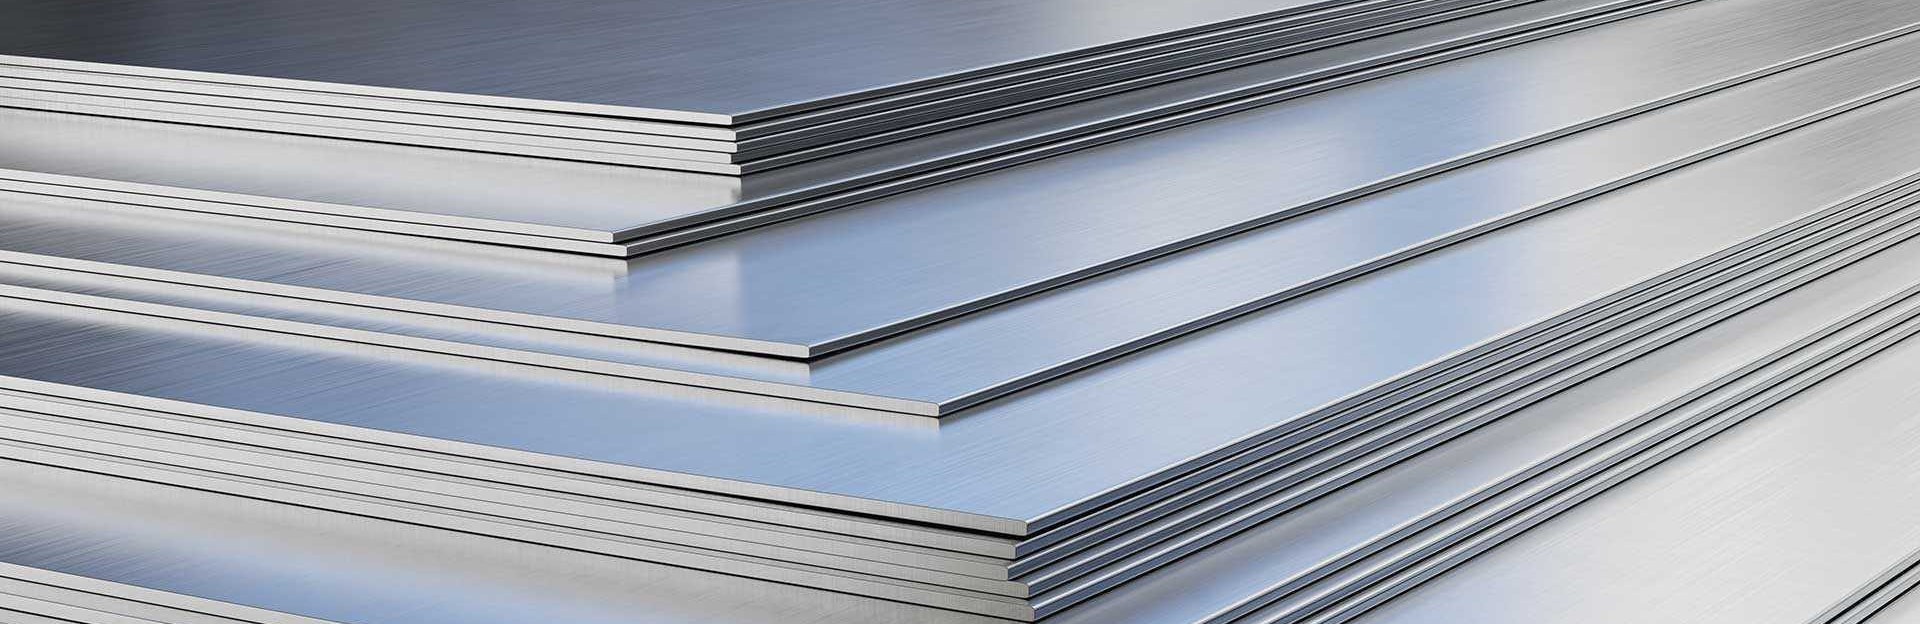

<div style = '
  border: 2px solid #3d3d3d;
  border-radius: 20px 0px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px rgb(61, 61, 61);
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px'>
      <h1> > Steel Plate Defect Prediction</h1>
</div>

<div style = 'font-family: Ebrima; font-size:16px'>
    <h2>
        — Introduction
    </h2>
    <hr>
    <p>
        In this competition, we are given a synthetically-generated dataset based on UCI's <a href = 'https://archive.ics.uci.edu/dataset/198/steel+plates+faults'>Steel Plates Faults</a> dataset with the goal of predicting the probability of various defects on steel plates. This notebook details the various steps I've taken, followed by some analytical insights, to develop a classifier for steel plate defects: 
    </p>
    <ul style = 'line-height: 35px; counter-reset:item'>
        <li><a href = '#chapter-one'>Importing Dependencies</a></li>
        <li><a href = '#chapter-two'>Exploratory Data Analysis</a></li>
        <ul>
            <li><a href = '#chapter-two-sub-one'>First Glances at the Data</a></li>
            <li><a href = '#chapter-two-sub-two'>Correlation Analysis</a></li>
            <li><a href = '#chapter-two-sub-three'>Target Analysis</a></li>
            <li><a href = '#chapter-two-sub-four'>Distributions of Train and Original Data</a></li>
        </ul>
        <li><a href = '#chapter-three'>Preprocessing</a></li>
        <ul>
            <li><a href = '#chapter-three-sub-one'>Feature Engineering</a></li>
        </ul>
        <li><a href = '#chapter-four'>Modelling</a></li>
        <ul>
            <li><a href = '#chapter-four-sub-one'>Cross-validate with Base Parameters</a></li>
            <li><a href = '#chapter-four-sub-two'>Feature Selection</a></li>
            <li><a href = '#chapter-four-sub-three'>Hyperparameter Tuning</a></li>
        </ul>
        <li><a href = '#chapter-five'>Submission</a></li>
    </ul>
</div>
<div style = 'font-family:Ebrima; font-size:16px'>
    <h2>
        — Experiments
    </h2>
    <hr>
    Experiments were done using a VotingClassifier w/ RobustScaler 5-fold StratifiedKFold CV. For constituent models in the ensemble, refer to <a href = '#chapter-four'>Modelling</a> section.
    <br>
    <br>
    <table style = 'font-size: 14px; text-align: center'>
        <tr>
            <th></th>
            <th>Experiment 1</th>
            <th>Experiment 2</th>
            <th>Experiment 3</th>
            <th>Experiment 4</th>
            <th>Experiment 5</th>
            <th>Experiment 6</th>
            <th>Experiment 7</th>
        </tr>
        <tr>
            <th>Combine with Original</th>
            <td>❌</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
        </tr>
        <tr>
            <th>Drop Defects</th>
            <td>❌</td>
            <td>❌</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
        </tr>
        <tr>
            <th>Drop Steeltypes</th>
            <td>❌</td>
            <td>❌</td>
            <td>❌</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>✔️</td>
        </tr>
        <tr>
            <th>Apply Feature Engineering</th>
            <td>❌</td>
            <td>❌</td>
            <td>❌</td>
            <td>❌</td>
            <td>✔️</td>
            <td>✔️</td>
            <td>❌</td>
        </tr>
        <tr>
            <th>Apply Feature Selection</th>
            <td>❌</td>
            <td>❌</td>
            <td>❌</td>
            <td>❌</td>
            <td>❌</td>
            <td>✔️</td>
            <td>✔️</td>
        </tr>
        <tr>
            <th>CV Score</th>
            <td>0.871670</td>
            <td>0.882288</td>
            <td>0.898372</td>
            <td>0.898935</td>
            <td>0.898334</td>
            <td>0.899389</td>
            <td>0.899015</td>
        </tr>
        <tr>            
            <th>Deviations</th>
            <td style = 'color:#FA4A75'><b>-0.02439</b></td>
            <td style = 'color:#FA4A75'><b>-0.01199</b></td>
            <td style = 'color:#766DA0'><b>0.006766</b></td>
            <td style = 'color:#766DA0'><b>0.007423</b></td>
            <td style = 'color:#766DA0'><b>0.006722</b></td>
            <td style = 'color:#766DA0'><b>0.007953</b></td>
            <td style = 'color:#766DA0'><b>0.007517</b></td>
        </tr>
    </table>
</div>

In [1]:
CONFIG = {'SEED':1337, 
          'COMBINE_W_ORIG':True, # combine comp. data with original data
          'DROP_DEFECTS':True, # drop none and double defects
          'DROP_STEELTYPES':True, # drop none or double steel types
          'APPLY_FEATURE_ENGINE':True, # apply feature engineering
          'APPLY_FEATURE_SELECT':True, #  apply feature selection
          'ENABLE_GPU':True}

<a id = 'chapter-one'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 20px 0px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px rgb(61, 61, 61);
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px'>
    <div>
        <h1>1. Importing Dependencies</h1>
    </div>
</div>

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, log_loss, f1_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2
from sklearn.pipeline import make_pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import make_column_transformer

warnings.simplefilter('ignore')
sns.set(style = 'whitegrid', palette = 'Set2')

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
# add scaler to config dictionary
CONFIG['SCALER'] = RobustScaler()

<a id = 'chapter-two'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 20px 0px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px rgb(61, 61, 61);
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px'>
    <div>
        <h1>2. Exploratory Data Analysis</h1>
    </div>
</div>
<div style = 
'display:flex;
 border: 2px solid;
 border-radius: 1px 1px 20px 20px; 
 margin-top: 20px; 
 text-align:center; 
 font-size: 20px; 
 background-color: #3d3d3d; 
 color: white'>
     <div style = 'width:50%; text-align:center; padding:5px'>
        <a href = '#chapter-one' style = 'color:white; text-decoration:none'>▲ - Previous Section</a>
     </div>
    <div style = 'border-left: 10px solid white; margin-right:10px; margin-left:10px'>
     </div>
    <div style = 'width:50%; text-align:center; padding:5px'>
        <a href = '#chapter-three' style = 'color:white; text-decoration:none'>▼ - Next Section</a>
     </div>
</div>
 

In [4]:
main_dir = '/kaggle/input/playground-series-s4e3/'
orig_dir = '/kaggle/input/steel-plates-faults-from-uci/'

# Competiton data
train_data = pd.read_csv(main_dir + 'train.csv').drop('id', axis = 1)
test_data = pd.read_csv(main_dir + 'test.csv').drop('id', axis = 1)

# Original data
orig_data = pd.read_csv(orig_dir + 'Steel Plates Faults.csv')

<a id = 'chapter-two-sub-one'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 450px;'>
    <div>
        <h2>2.1. First Glances at the Data</h2>
    </div>
</div>

<h2 style = 'font-family: Ebrima'>Train Data</h2> 

In [5]:
train_data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0        584        590     909972     909977            16            8   
1        808        816     728350     728372           433           20   
2         39        192    2212076    2212144         11388          705   
3        781        789    3353146    3353173           210           16   
4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0            5               2274                    113   
1           54              44478                     70   
2          420            1311391                     29   
3           29               3202                    114   
4           67              48231                     82   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    140  ...            -0.5000           -0.0104   
1                    111  ...             0.7419           -0.2997   
2                    141  ...            -0.0105           -0.0944   
3                    134  ...             0.6667           -0.0402   
4                    111  ...             0.9158           -0.2455   

   SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0          0.1417       0          0         0       1          0      0   
1          0.9491       0          0         0       0          0      0   
2          1.0000       0          0         1       0          0      0   
3          0.4025       0          0         1       0          0      0   
4          0.9998       0          0         0       0          0      0   

   Other_Faults  
0             0  
1             1  
2             0  
3             0  
4             1  

[5 rows x 34 columns]

In [6]:
train_data.describe().T.style.background_gradient(cmap = 'Greens')

In [7]:
print(f'Train Data | Number of Null Values: {train_data.isna().sum().sum()}')
print(f'Train Data | Number of Duplicated Values: {train_data.duplicated().sum().sum()}')

Train Data | Number of Null Values: 0
Train Data | Number of Duplicated Values: 0


<h2 style = 'font-family: Ebrima'>Test Data</h2> 

In [8]:
test_data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0       1015       1033    3826564    3826588           659           23   
1       1257       1271     419960     419973           370           26   
2       1358       1372     117715     117724           289           36   
3        158        168     232415     232440            80           10   
4        559        592     544375     544389           140           19   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           46              62357                     67   
1           28              39293                     92   
2           32              29386                    101   
3           11               8586                    107   
4           15              15524                    103   

   Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0                    127  ...           0.0095         0.5652         1.0000   
1                    132  ...           0.0047         0.2414         1.0000   
2                    134  ...           0.0155         0.6000         0.7500   
3                    140  ...           0.0037         0.8000         1.0000   
4                    134  ...           0.0158         0.8421         0.5333   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.8410       1.1139       1.6628   
1                   1.0      2.5682       0.9031       1.4472   
2                   0.0      2.4609       1.3222       1.3222   
3                   1.0      1.9031       0.6990       1.0414   
4                   0.0      2.1461       1.3222       1.1461   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0             0.6727           -0.2261          0.9172  
1             0.9063           -0.1453          0.9104  
2            -0.5238           -0.0435          0.6514  
3             0.1818           -0.0738          0.2051  
4            -0.5714           -0.0894          0.4170  

[5 rows x 27 columns]

In [9]:
test_data.describe().T.style.background_gradient(cmap = 'Greens')

In [10]:
print(f'Test Data | Number of Null Values: {test_data.isna().sum().sum()}')
print(f'Test Data | Number of Duplicated Values: {test_data.duplicated().sum().sum()}')

Test Data | Number of Null Values: 0
Test Data | Number of Duplicated Values: 0


<h2 style = 'font-family: Ebrima'>Original Data</h2> 

In [11]:
orig_data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             0.7931           -0.1756   
2                    125  ...             0.6667           -0.1228   
3                    126  ...             0.8444           -0.1568   
4                    126  ...             0.9338           -0.1992   

   SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0          0.5822       1          0         0       0          0      0   
1          0.2984       1          0         0       0          0      0   
2          0.2150       1          0         0       0          0      0   
3          0.5212       1          0         0       0          0      0   
4          1.0000       1          0         0       0          0      0   

   Other_Faults  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [12]:
orig_data.describe().T.style.background_gradient(cmap = 'Greens')

In [13]:
print(f'Original Data | Number of Null Values: {orig_data.isna().sum().sum()}')
print(f'Original Data | Number of Duplicated Values: {orig_data.duplicated().sum().sum()}')

Original Data | Number of Null Values: 0
Original Data | Number of Duplicated Values: 0


<div style = '
  display:flex;
  flex-direction:row;
  border: 2px solid #3d3d3d;
  padding: 5px;
  box-shadow: 6px 9px;
  font-family: Ebrima;
  width:650px'>
    <div style = 'display: flex; flex-direction: row'>
        <span style = 'font-size:22px; margin:12px;'>🔎︎</span>
        <span style = 'border-right: thin solid black; margin: 15px 20px 15px 0px'></span>
    </div>
    <p style = 'font-size:18px; margin-top:15px'> All datasets do not have any null values nor any duplicated values.</p>
</div>

<a id = 'chapter-two-sub-two'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 400px;'>
    <div>
        <h2>2.2. Correlation Analysis</h2>
    </div>
</div>

In [14]:
# Specify classes
classes = train_data.columns[-7:].tolist()
classes

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [15]:
# Create 'Defects' column
def get_defect_names(row):
    column_names = []
    for col, val in row.items():
        if val == 1:
            column_names.append(col)
    if len(column_names) > 1:
        return '>1_Defect'
    elif len(column_names) == 1:
        return column_names[0]
    else:
        return 'N/A'

train_data['Defect'] = train_data[classes].apply(lambda row: get_defect_names(row), axis = 1)
orig_data['Defect'] = orig_data[classes].apply(lambda row: get_defect_names(row), axis = 1)

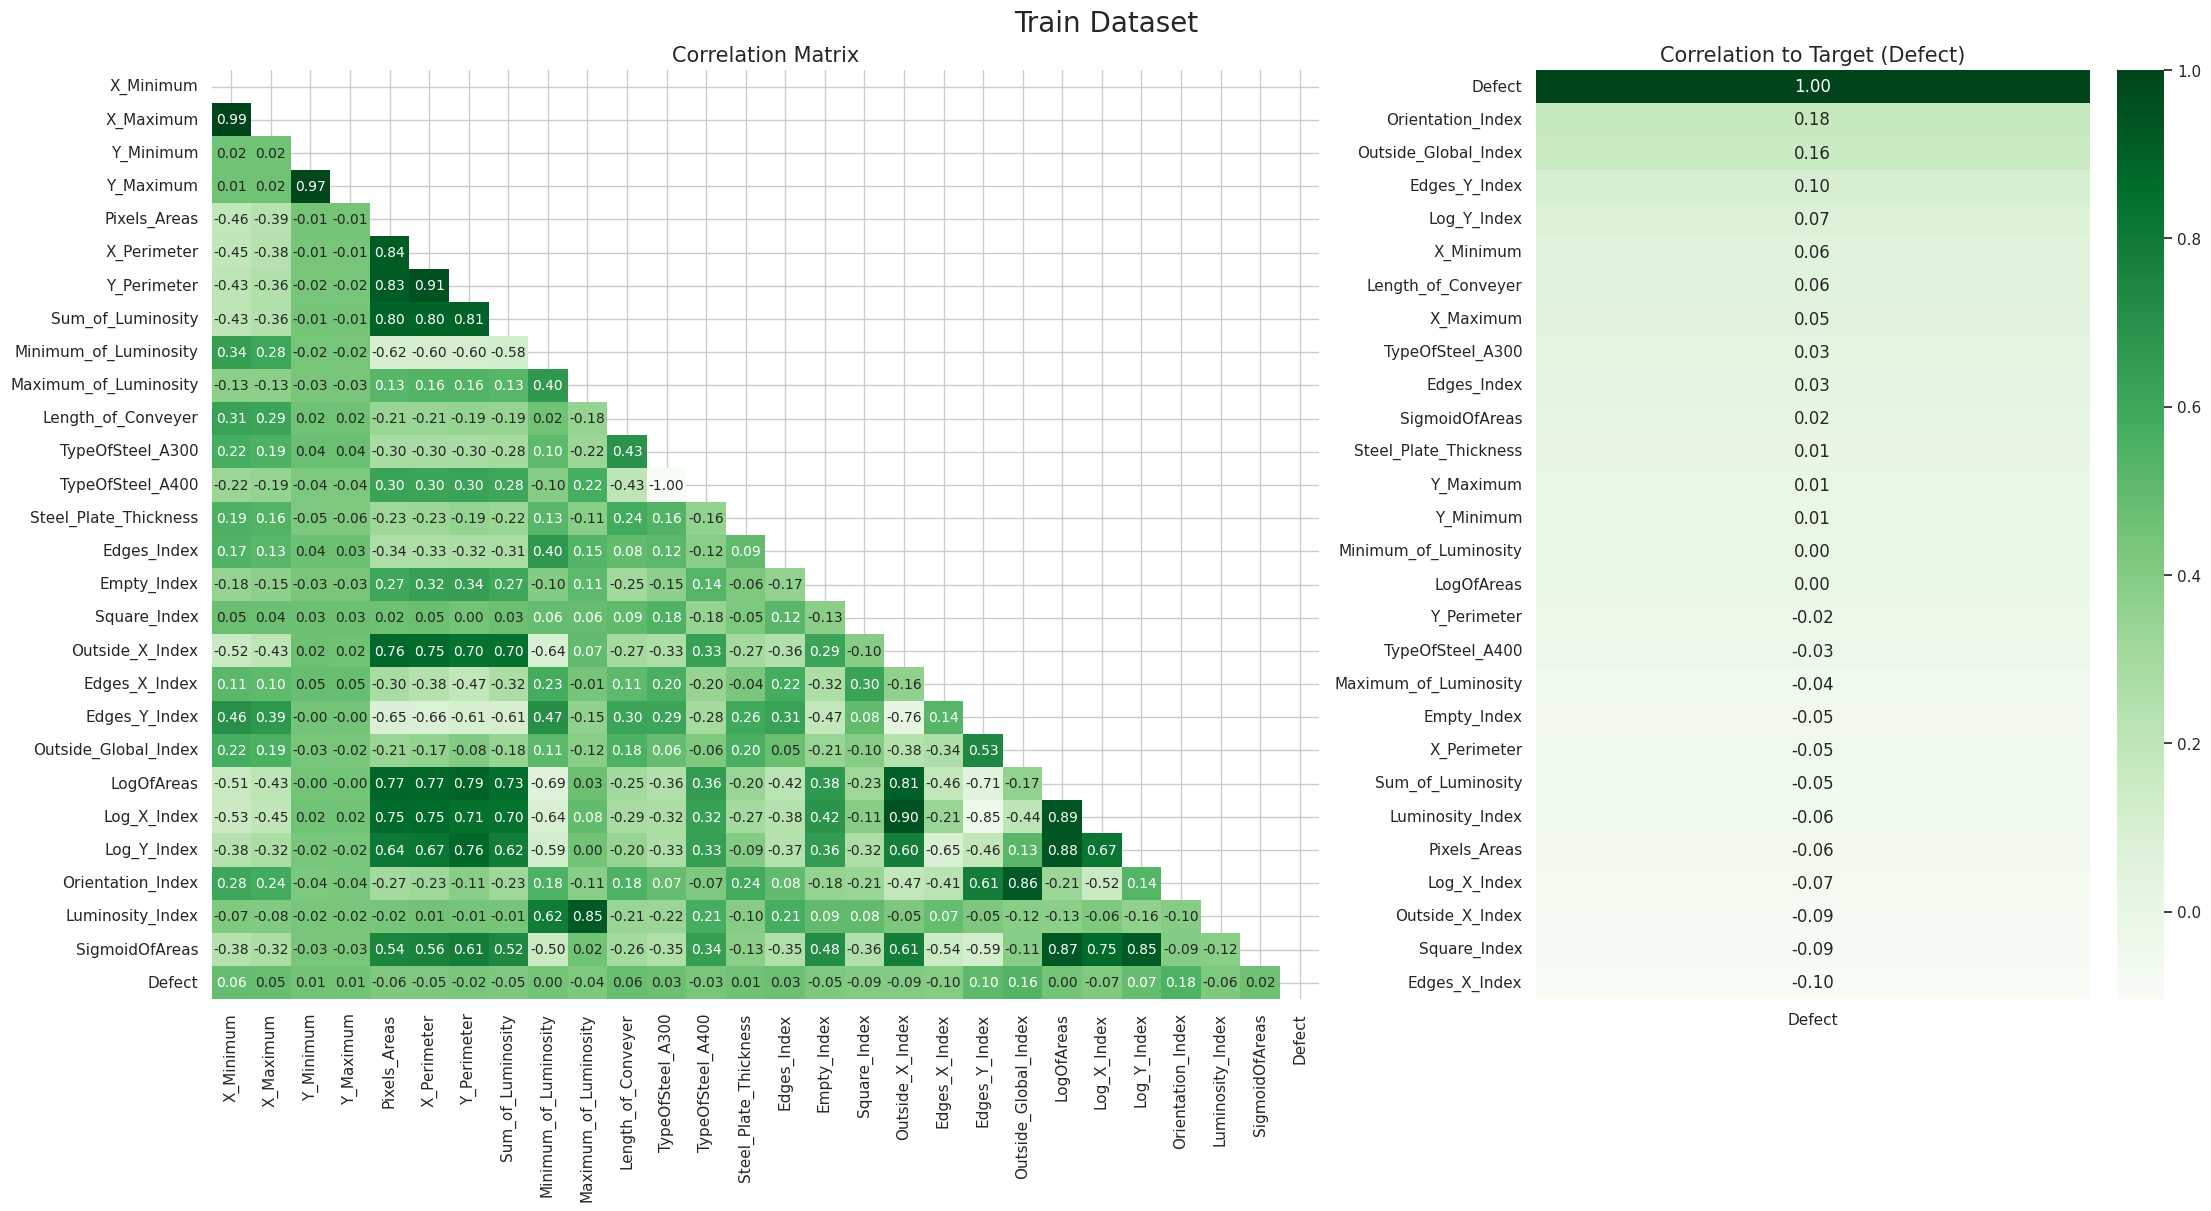

In [16]:
def view_correlations(data, target, title, annot = True, fmt = '.2f', cmap = 'Greens', figsize = (22, 12)):
    fig = plt.figure(figsize = figsize, constrained_layout = True)
    gs = fig.add_gridspec(1, 3)
    
    corr_hm_ax = fig.add_subplot(gs[0, :-1])
    corr_target_ax = fig.add_subplot(gs[0, 2])
    
    mask = np.triu(data.corr())
    
    corr_hm_ax.set_title('Correlation Matrix', size = 15)
    corr_target_ax.set_title(f'Correlation to Target ({target})', size = 15)
    
    sns.heatmap(data.corr(), mask = mask, annot = annot, fmt = fmt, cmap = cmap, ax = corr_hm_ax, cbar = False, annot_kws = {'size': 10})
    sns.heatmap(data.corr()[target].sort_values(ascending = False).to_frame(), annot = annot, fmt = fmt, cmap = cmap)
    
    fig.suptitle(title, size = 20)
    fig.show()
    
defect_map = {'Stains':0, 'Other_Faults':1, 'K_Scatch':2, 'Bumps':3, 'Pastry':4, 'Z_Scracth':5, 'Dirtiness':6, 'N/A':7, '>1_Defect':8}

train_copy = train_data.copy().drop(train_data.columns[-8:-1].tolist(), axis = 1)
train_copy['Defect'] = train_data['Defect'].map(defect_map)

view_correlations(train_copy, 'Defect', title = 'Train Dataset')

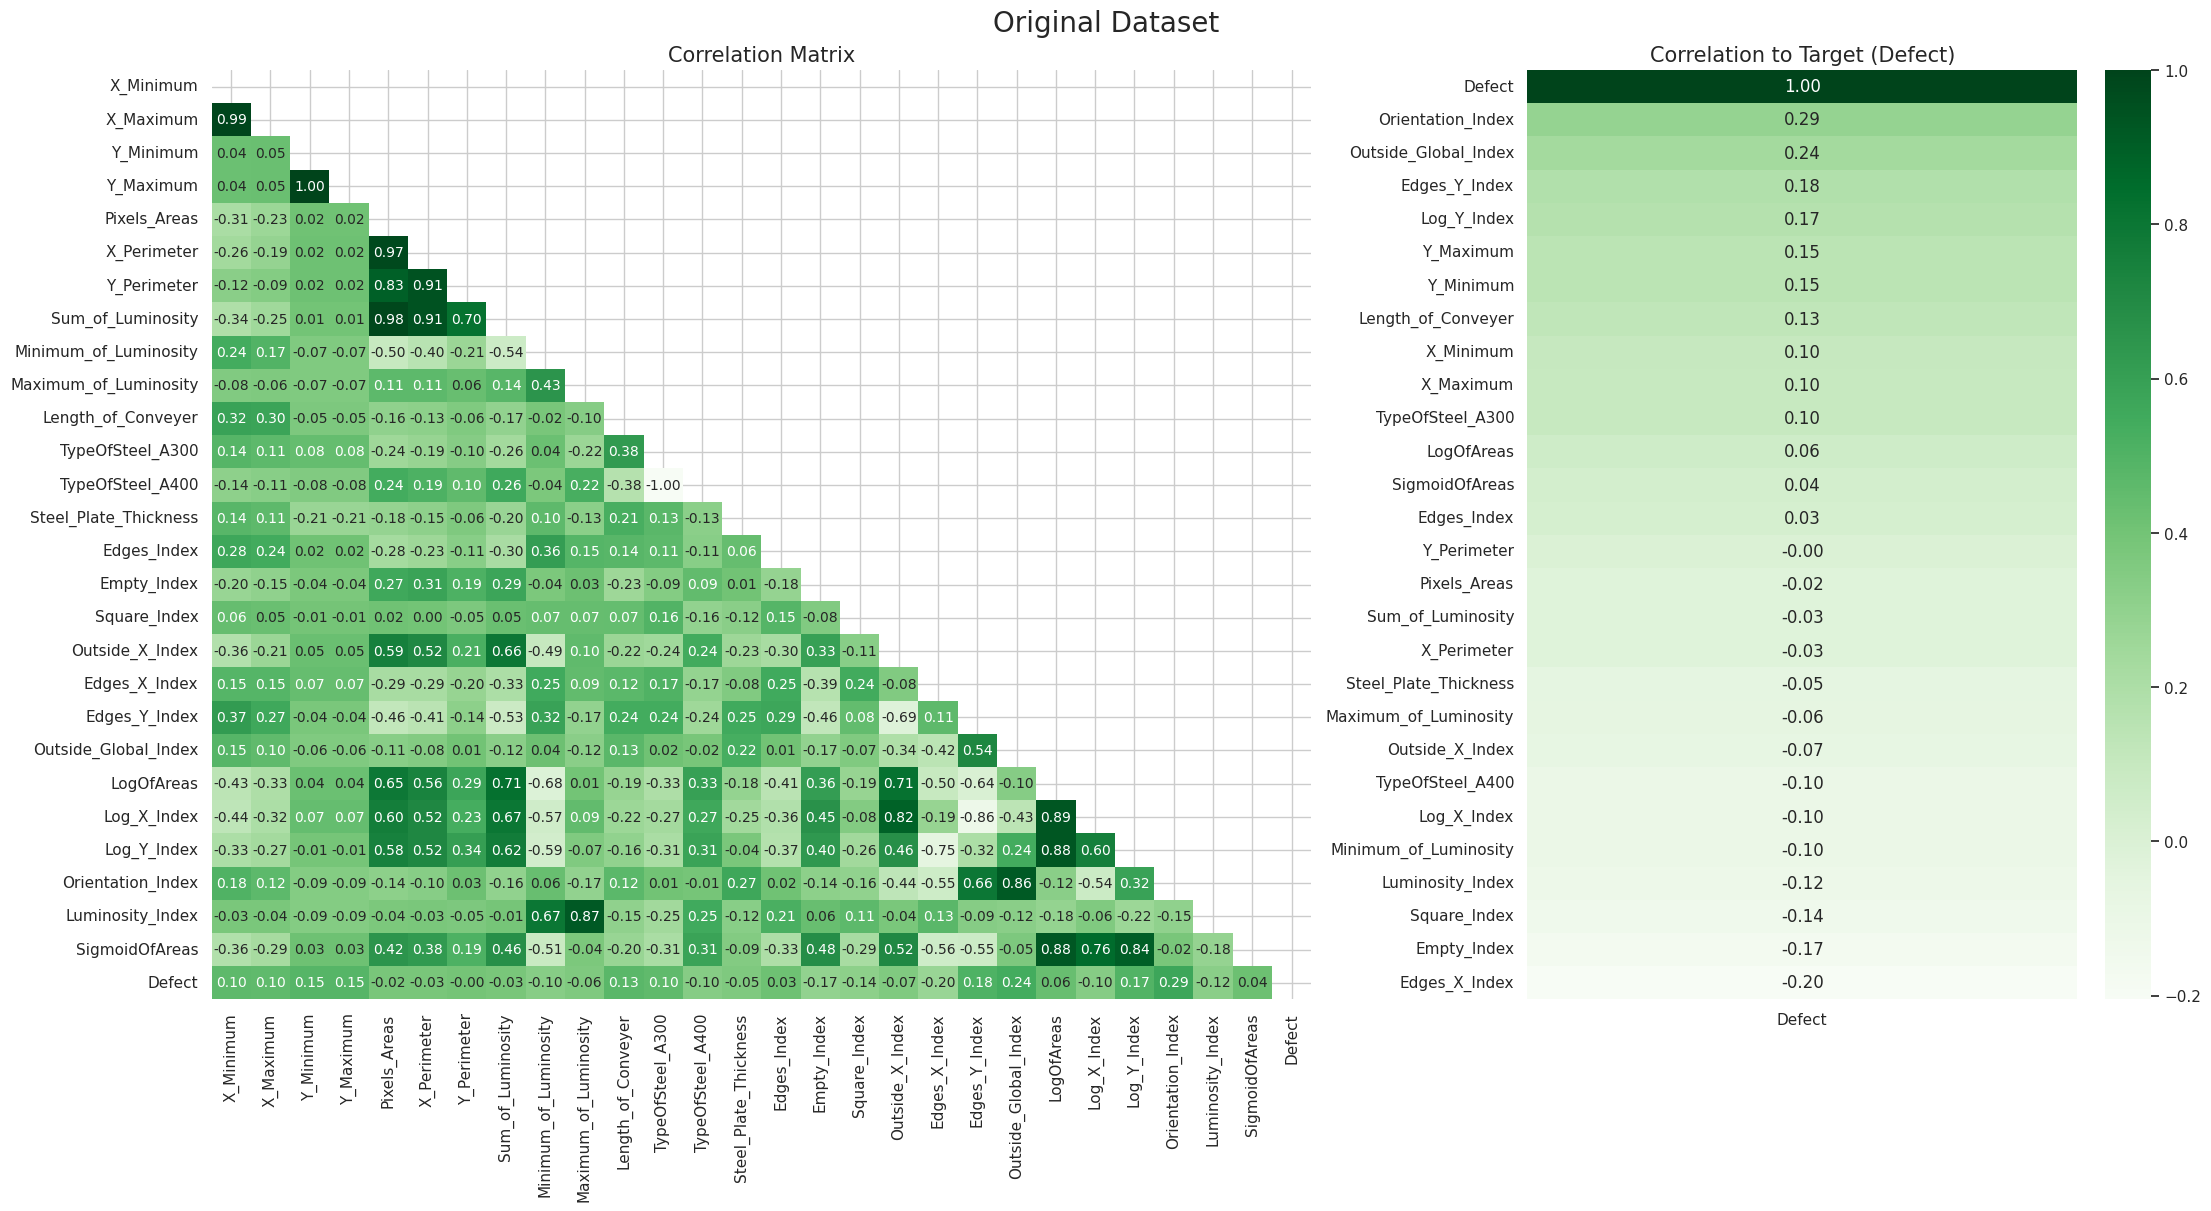

In [17]:
orig_copy = orig_data.drop(orig_data.columns[-8:-1].tolist(), axis = 1)
orig_copy['Defect'] = orig_data['Defect'].map(defect_map)

view_correlations(orig_copy, 'Defect', title = 'Original Dataset')

<div style = '
  display:flex;
  flex-direction:row;
  border: 2px solid #3d3d3d;
  padding: 5px;
  box-shadow: 6px 9px;
  font-family: Ebrima;
  width:1000px'>
    <div style = 'display: flex; flex-direction: row'>
        <span style = 'font-size:22px; margin:25px 12px 0px 12px;'>🔎︎</span>
        <span style = 'border-right: thin solid black; margin: 15px 20px 15px 0px'></span>
    </div>
    <p style = 'font-size:18px; margin-top:15px'> A number of features from both train and original datasets have strong positive and negative correlation to one another. A few of them are mentioned in the table below:</p>
</div>

<div style = 'font-family: Ebrima'>
    <table style = 'font-size: 15px'>
        <tr>
            <th>Strong Positive Correlation</th>
            <th>Strong Negative Correlation</th>
        </tr>
        <tr style = 'text-align: center'>
            <td><code>X_Maximum</code> and <code>X_Minimum</code></td>
            <td><code>Edges_Y_Index</code> and <code>Outside_X_Index</code></td>
        </tr>
        <tr style = 'text-align: center'>
            <td><code>Y_Maximum</code> and <code>Y_Minimum</code></td>
            <td><code>Log_X_Index</code> and <code>Edges_Y_Index</code></td>
        </tr>
        <tr style = 'text-align: center'>
            <td><code>X_Perimeter</code> and <code>Pixel_Areas</code></td>
            <td><code>Log_Y_Index</code> and <code>Edges_X_Index</code></td>
        </tr>
        <tr style = 'text-align: center'>
            <td><code>Sum of Luminosity</code> to <code>Pixel_Areas</code>, <code>X</code> & <code>Y</code> Perimeters</td>
            <td><code>LogOfAreas</code> and <code>Minimum_of_Luminosity</code></td>
        </tr>
    </table>
</div>

<a id = 'chapter-two-sub-three'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 380px;'>
    <div>
        <h2>2.3. Target Analysis</h2>
    </div>
</div>

In [18]:
def pie_count(data, target, name, labels = None, hue = None):
    fig, axes = plt.subplots(1, 2, figsize = (20, 6))
    axes[0].pie(data[target].value_counts().tolist(), labels = labels, autopct = '%1.1f%%')
    sns.countplot(data, x = target, ax = axes[1], hue = hue)
    fig.suptitle(name)
    fig.tight_layout()
    plt.show()

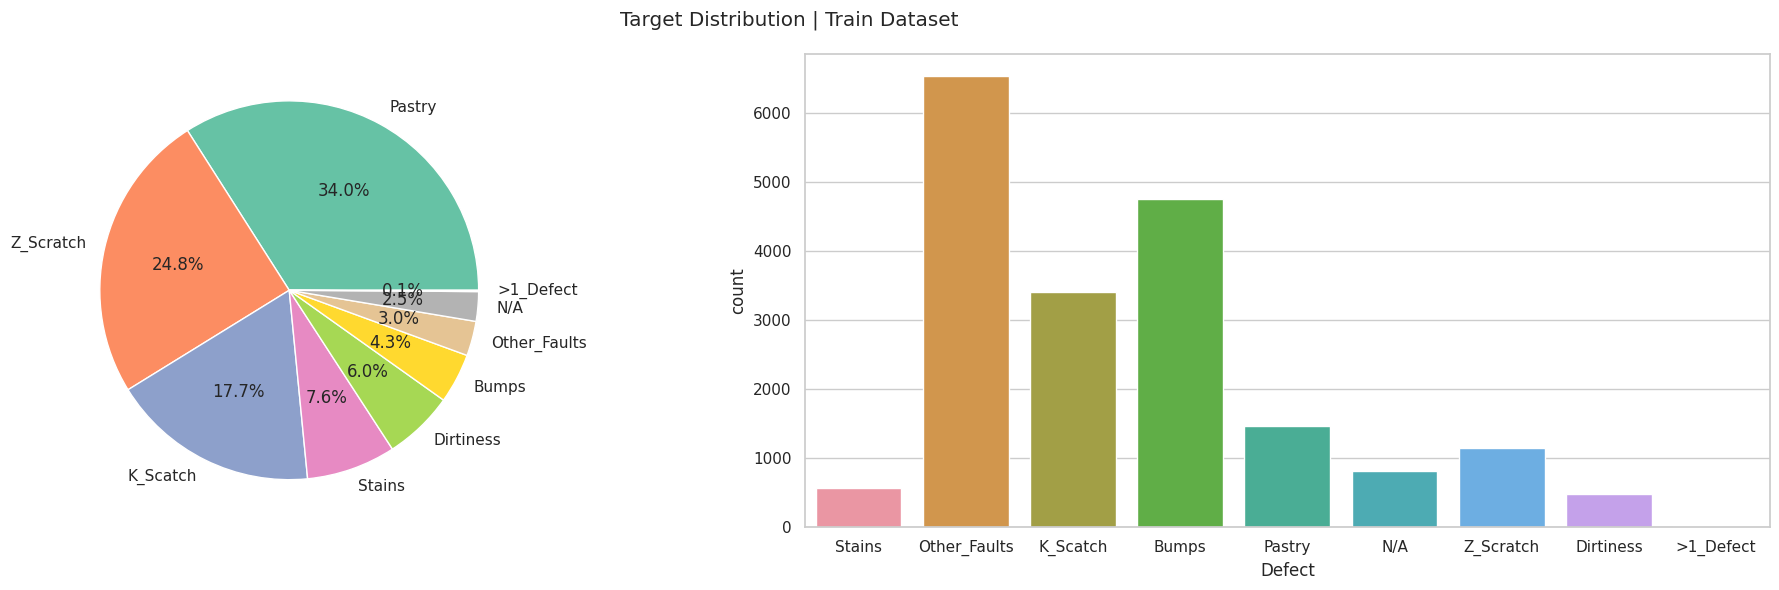

In [19]:
pie_count(train_data, 'Defect', name = 'Target Distribution | Train Dataset', labels = classes + ['N/A', '>1_Defect'])

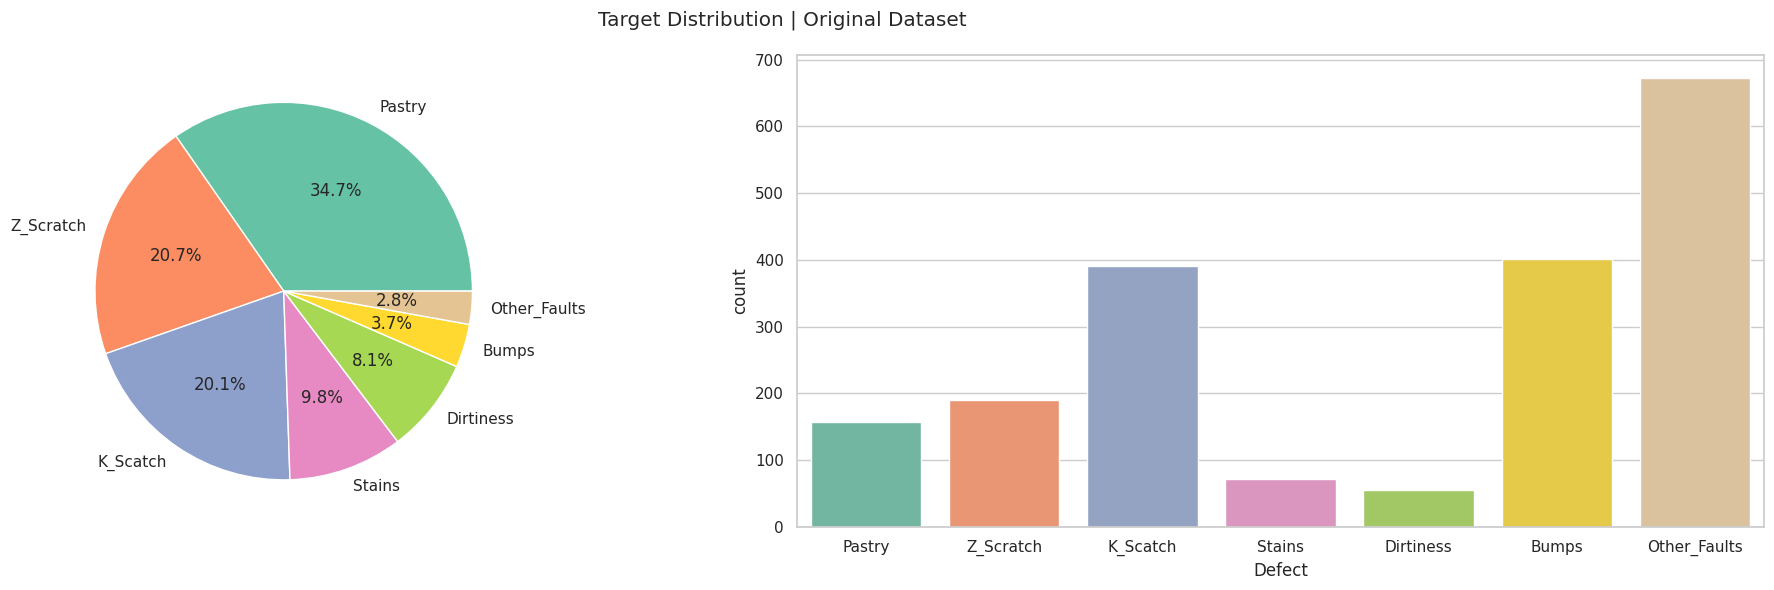

In [20]:
pie_count(orig_data, 'Defect', name = 'Target Distribution | Original Dataset', labels = classes)

In [21]:
print(f"Train Data | Total Number of Rows with More than One Defect: {len(train_data[train_data['Defect'] == '>1_Defect'])}")
print(f"Train Data | Total Number of Rows with No Defects: {len(train_data[train_data['Defect'] == 'N/A'])}")

print(f"\nOriginal Data | Total Number of Rows with More than One Defect: {len(orig_data[orig_data['Defect'] == '>1_Defect'])}")
print(f"Original Data | Total Number of Rows with No Defects: {len(orig_data[orig_data['Defect'] == 'N/A'])}")

# Enable to drop rows with more than one defect and rows with no defects
if CONFIG['DROP_DEFECTS']:
    train_data.drop(train_data[train_data['Defect'] == '>1_Defect'].index, inplace = True)
    train_data.drop(train_data[train_data['Defect'] == 'N/A'].index, inplace = True)
    print('\n>1_ & N/A Defects Dropped.')

train_data = train_data.reset_index(drop = True)

Train Data | Total Number of Rows with More than One Defect: 21
Train Data | Total Number of Rows with No Defects: 818

Original Data | Total Number of Rows with More than One Defect: 0
Original Data | Total Number of Rows with No Defects: 0

>1_ & N/A Defects Dropped.


<div style = '
  display:flex;
  flex-direction:row;
  border: 2px solid #3d3d3d;
  padding: 5px;
  box-shadow: 6px 9px;
  font-family: Ebrima;
  width:900px'>
    <div style = 'display: flex; flex-direction: row'>
        <span style = 'font-size:22px; margin:12px 12px 0px 12px;'>🔎︎</span>
        <span style = 'border-right: thin solid black; margin: 15px 20px 15px 0px'></span>
    </div>
    <p style = 'font-size:18px; margin-top:15px'> Rows with <u>more than one defect</u> and rows with <u>no defects</u> are not present in the original dataset.</p>
</div>

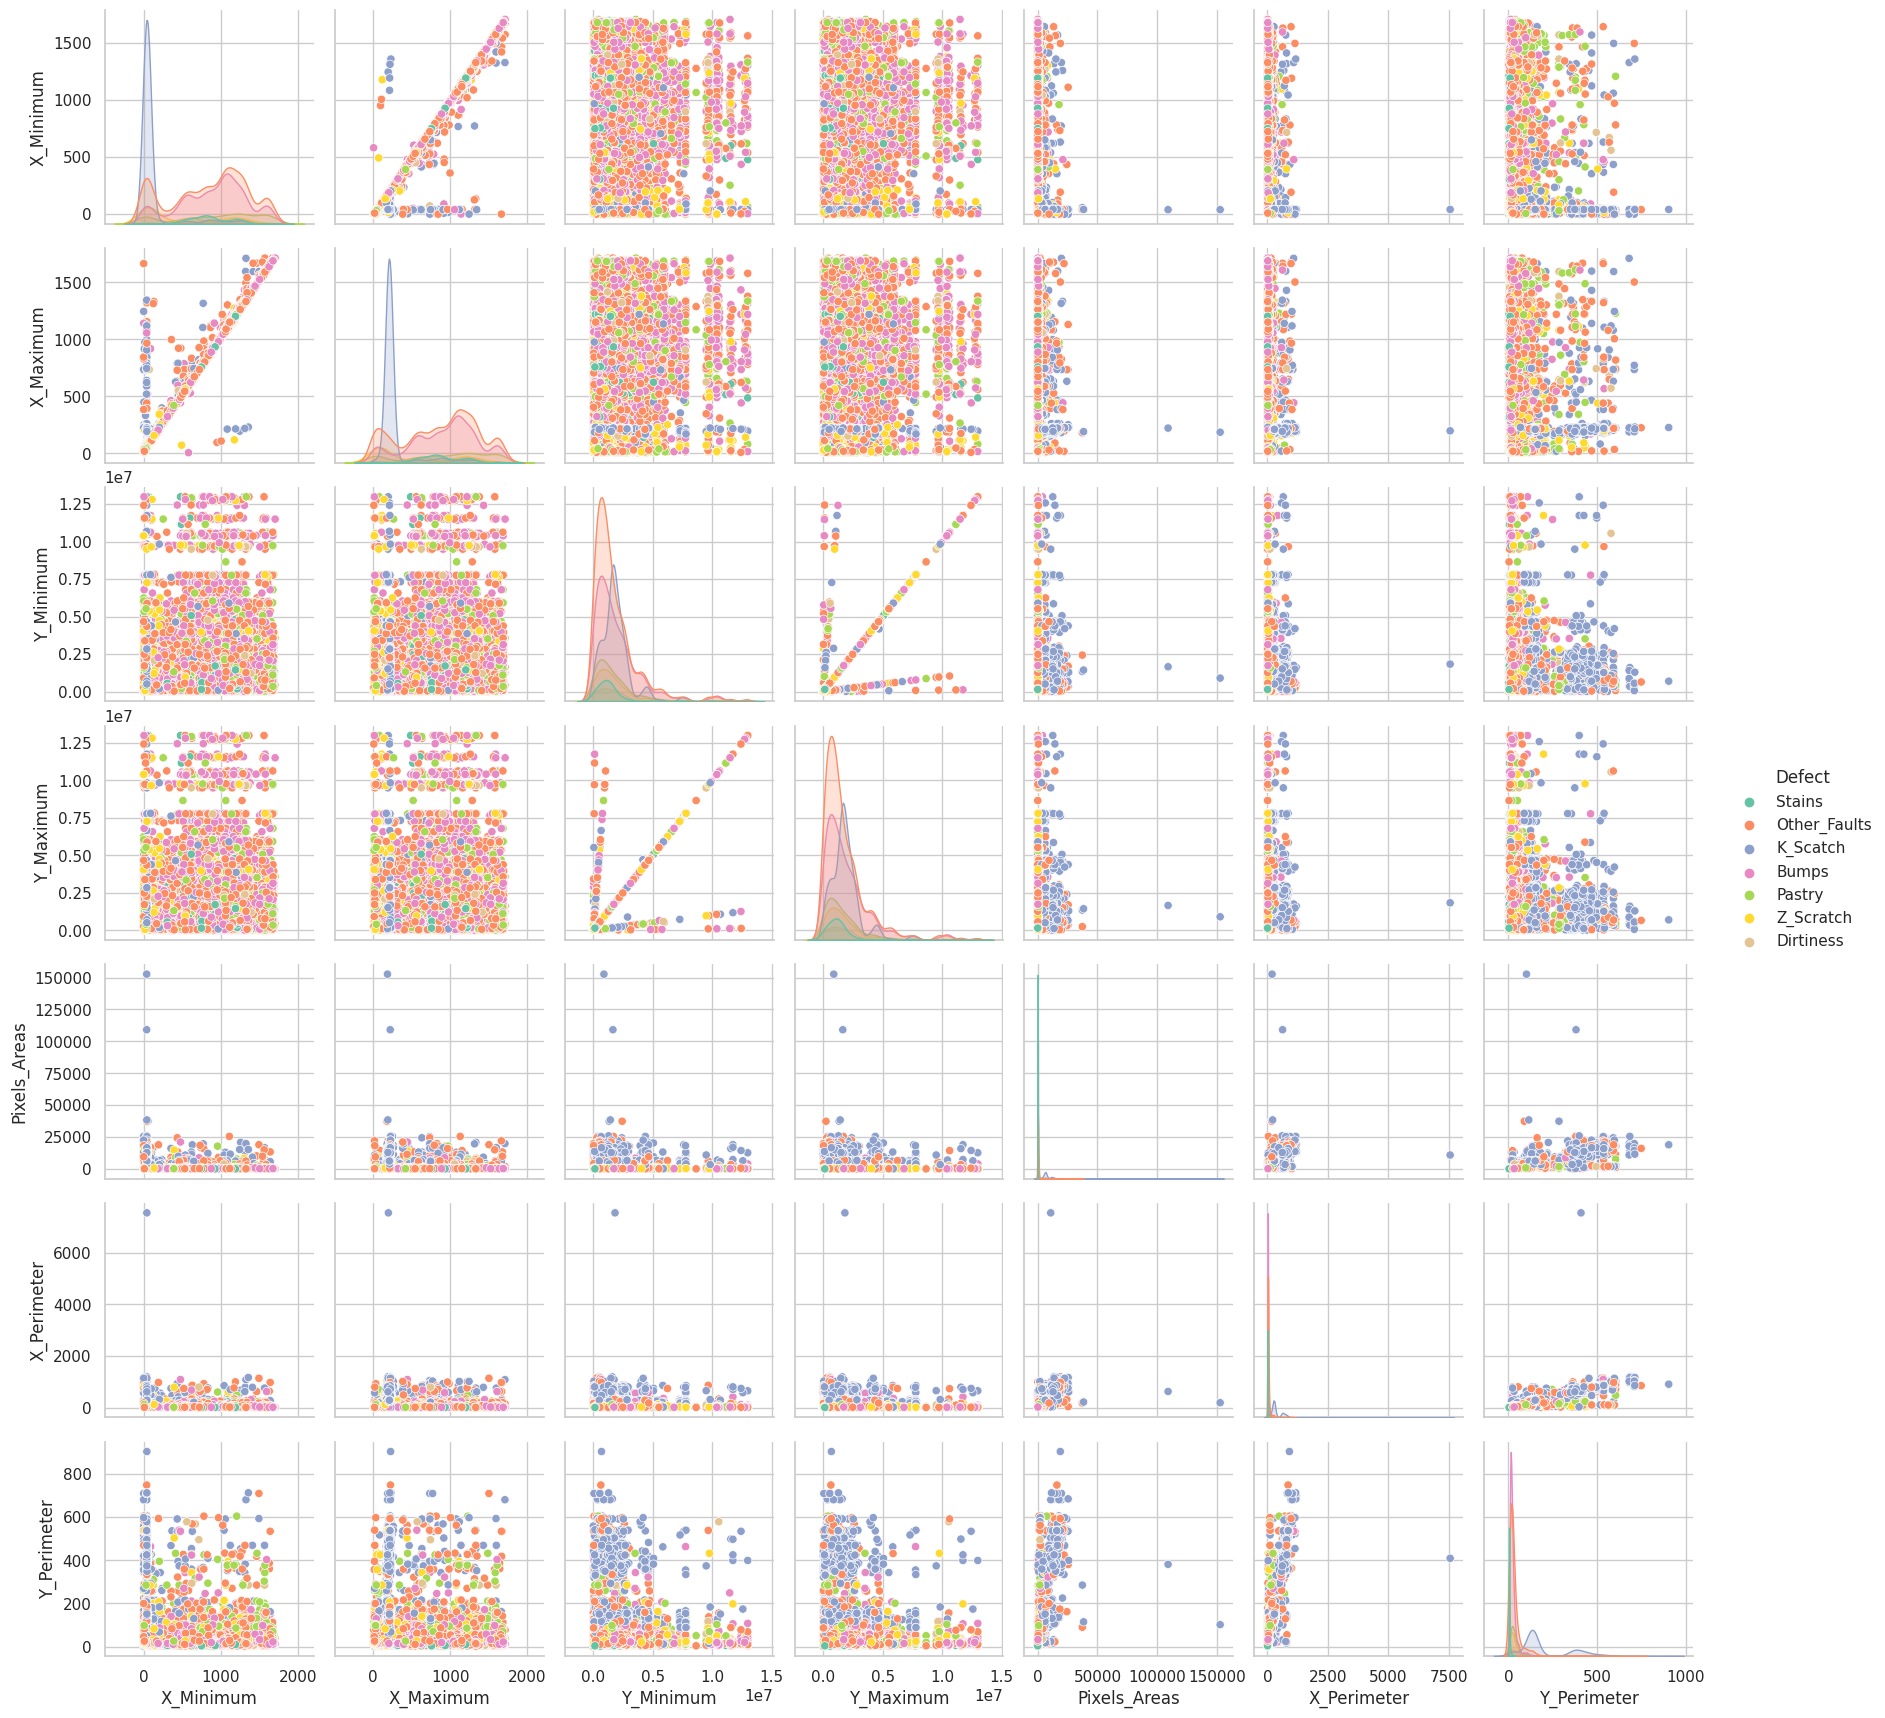

In [22]:
defect_coordinates_perimeters = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Defect']
sns.pairplot(train_data[defect_coordinates_perimeters], hue = 'Defect')
plt.show()

<div style = '
  display:flex;
  flex-direction:row;
  border: 2px solid #3d3d3d;
  padding: 5px;
  box-shadow: 6px 9px;
  font-family: Ebrima;
  width:1000px'>
    <div style = 'display: flex; flex-direction: row'>
        <span style = 'font-size:22px; margin:12px 12px 0px 12px;'>🔎︎</span>
        <span style = 'border-right: thin solid black; margin: 15px 20px 15px 0px'></span>
    </div>
    <p style = 'font-size:18px; margin-top:15px'>There is a clear linear relationship between <code>X_Maximum</code> and <code>X_Minimum</code>, as well as <code>Y_Maximum</code> and <code>Y_Minimum</code>.</p>
</div>

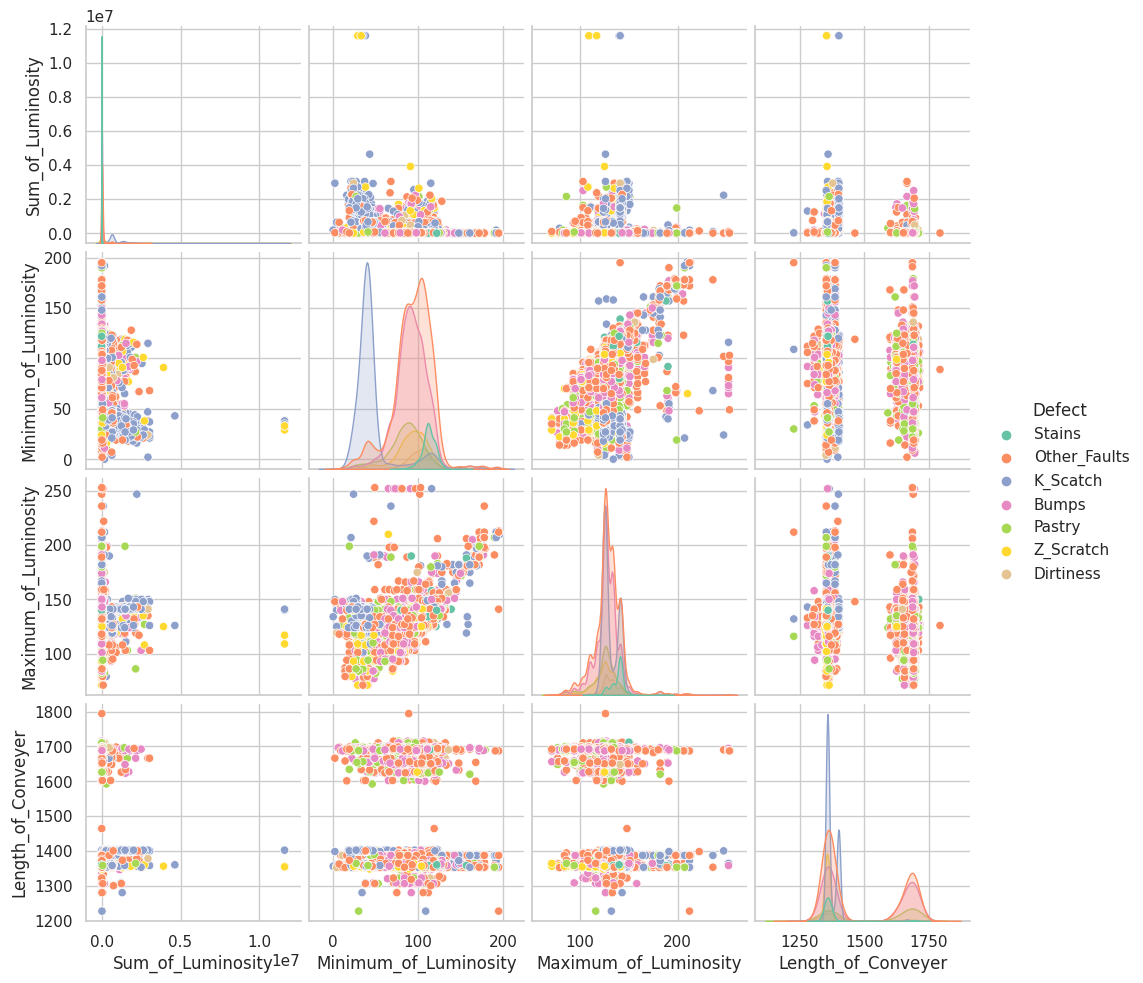

In [23]:
luminosity_conveyer = ['Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Defect']
sns.pairplot(train_data[luminosity_conveyer], hue = 'Defect')
plt.show()

<div style = '
  display:flex;
  flex-direction:row;
  border: 2px solid #3d3d3d;
  padding: 5px;
  box-shadow: 6px 9px;
  font-family: Ebrima;
  width:880px'>
    <div style = 'display: flex; flex-direction: row'>
        <span style = 'font-size:22px; margin:25px 12px 0px 12px;'>🔎︎</span>
        <span style = 'border-right: thin solid black; margin: 15px 20px 15px 0px'></span>
    </div>
    <p style = 'font-size:18px; margin-top:15px'> A seemingly linear relationship can be observed between <code>Maximum_of_Luminosity</code> and <code>Minimum_of_Luminosity</code>.</</p>
</div>

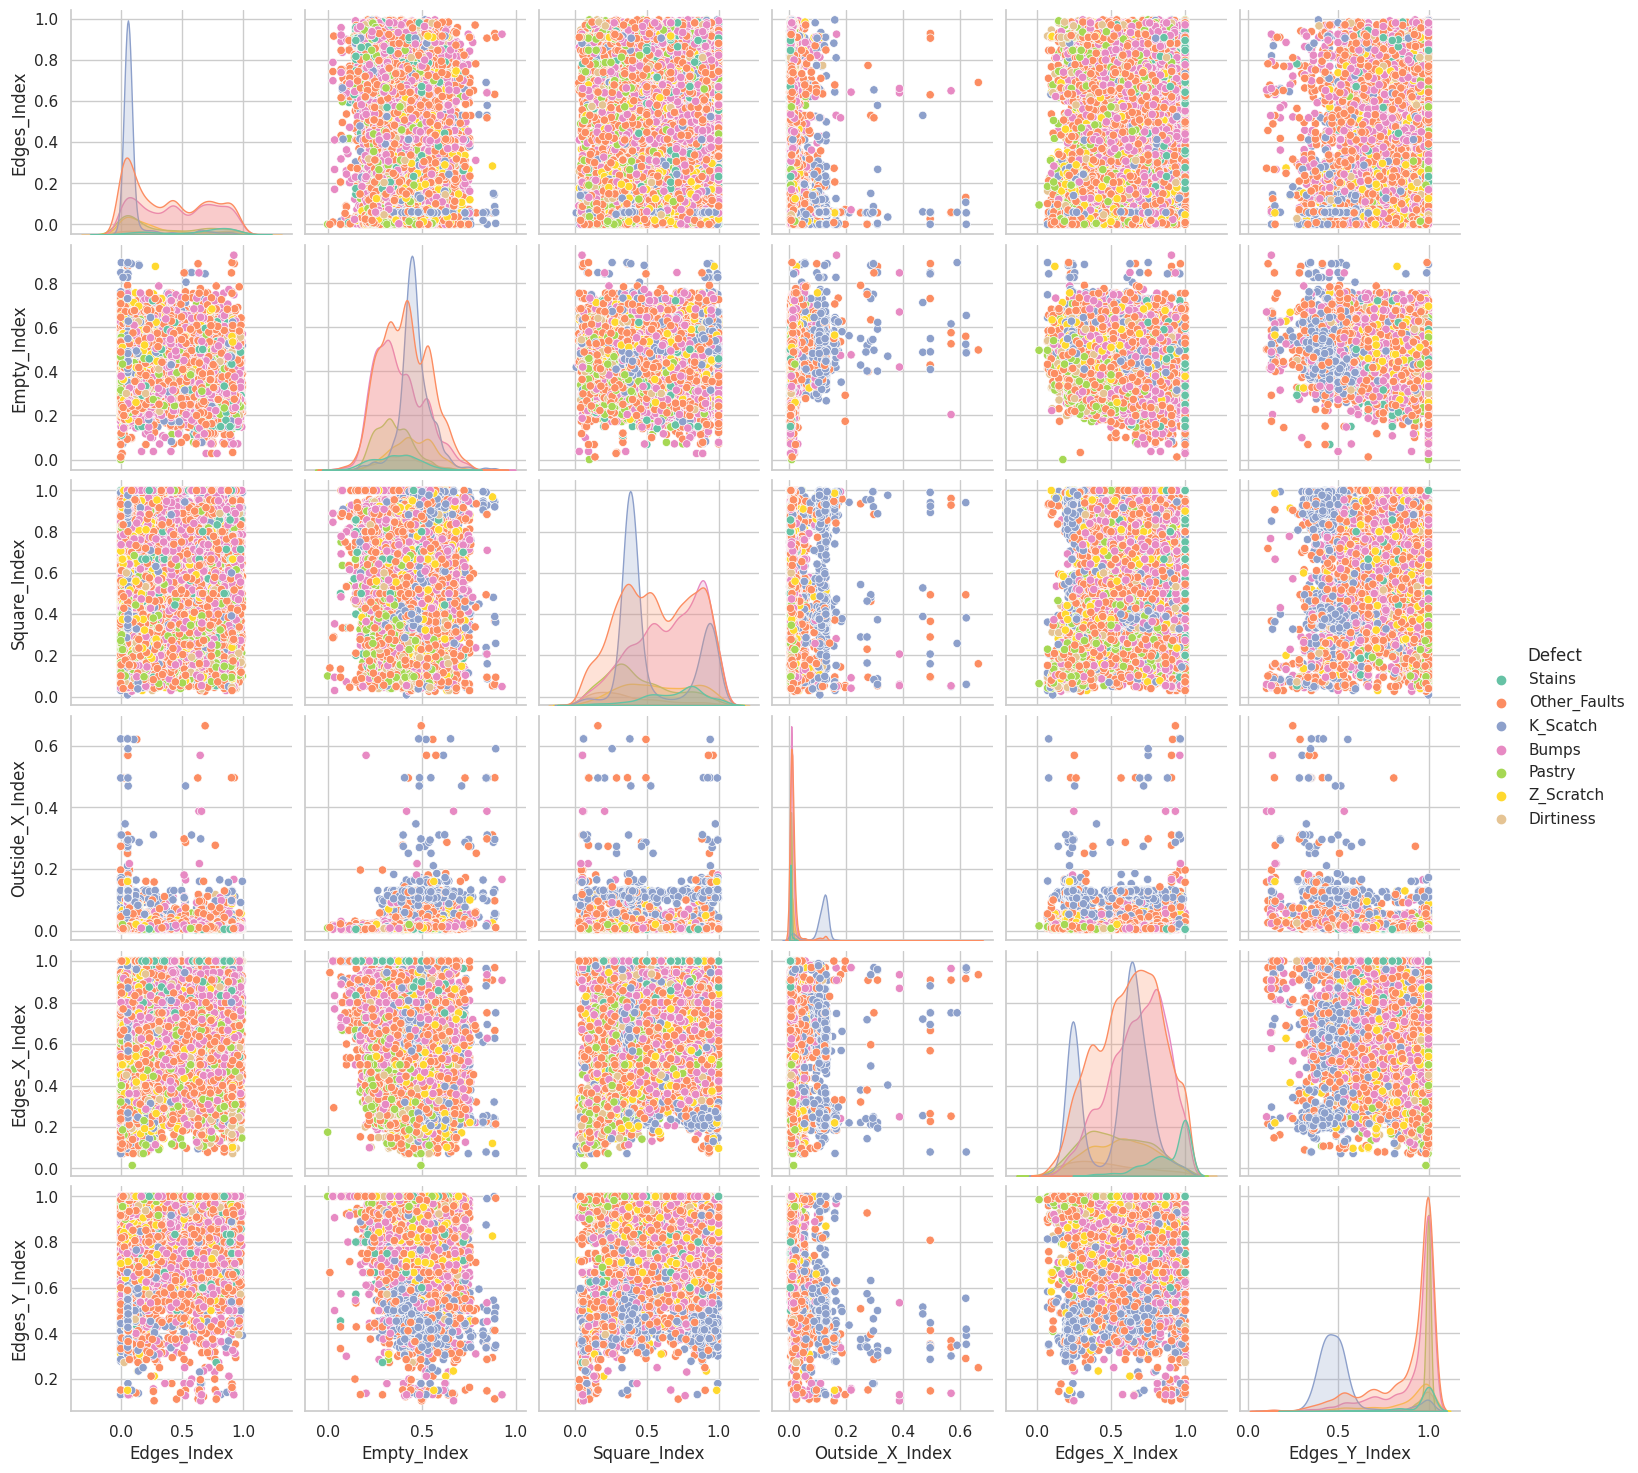

In [24]:
indices = ['Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 
           'Edges_X_Index', 'Edges_Y_Index', 'Defect']
sns.pairplot(train_data[indices], hue = 'Defect')
plt.show()

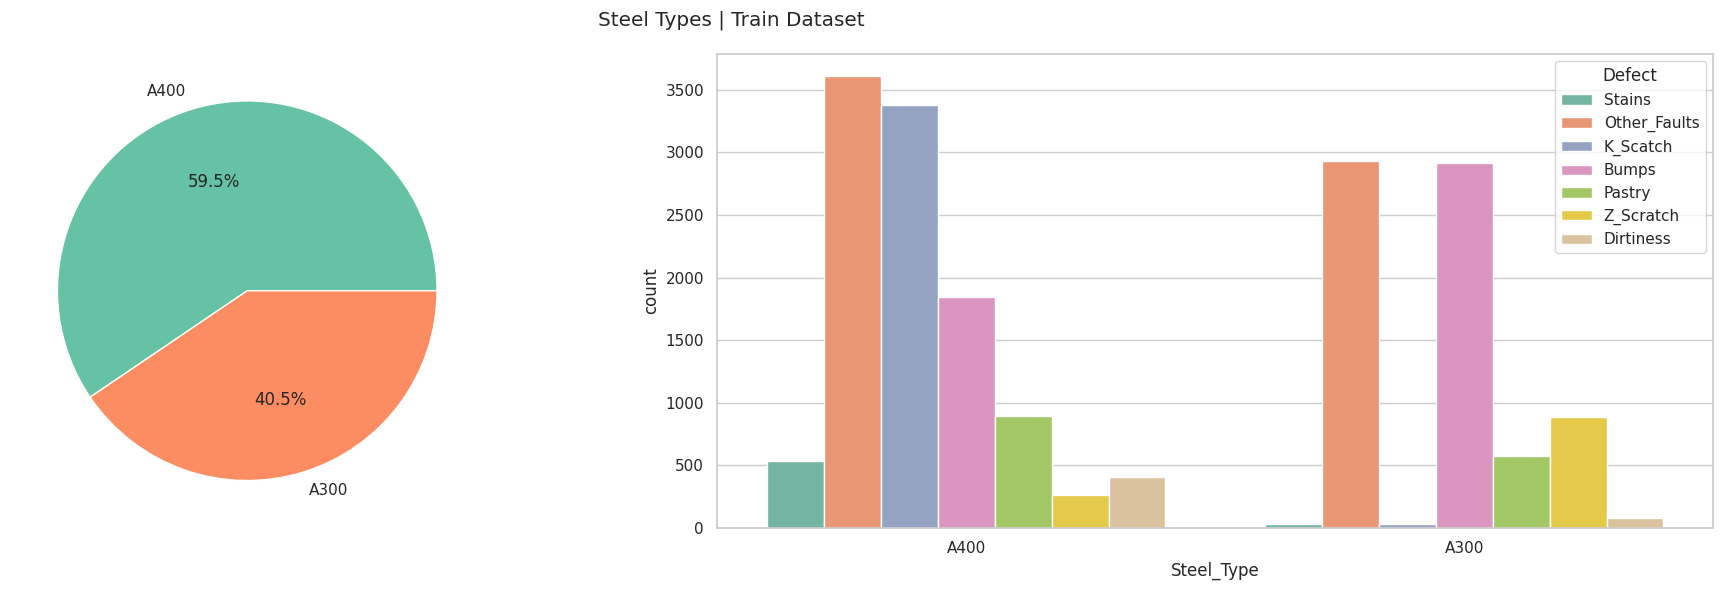

In [25]:
# Create a binary column explicity specifying steel type
train_data['Steel_Type'] = train_data[['TypeOfSteel_A300', 'TypeOfSteel_A400']].apply(lambda row: 'A300' if row['TypeOfSteel_A300'] == 1 else 'A400', axis = 1)
pie_count(train_data, 'Steel_Type', name = 'Steel Types | Train Dataset', labels = ['A400', 'A300'], hue = 'Defect')

# Immediately dropping this column from the training data 
# From previous tests, it made model performance significantly worse
train_data = train_data.drop('Steel_Type', axis = 1)

In [26]:
double_steeltype_indices = train_data[['TypeOfSteel_A300', 'TypeOfSteel_A400']][(train_data['TypeOfSteel_A300'] == 1) & (train_data['TypeOfSteel_A400'] == 1)].index
print(f'Train Data | Number of Rows with Double Steel Types: {len(double_steeltype_indices)}')

no_steeltype_indices = train_data[['TypeOfSteel_A300', 'TypeOfSteel_A400']][(train_data['TypeOfSteel_A300'] == 0) & (train_data['TypeOfSteel_A400'] == 0)].index.tolist()
print(f'Train Data | Number of Rows with No Steel Type: {len(no_steeltype_indices)}')

Train Data | Number of Rows with Double Steel Types: 1
Train Data | Number of Rows with No Steel Type: 19


In [27]:
train_data.iloc[double_steeltype_indices][['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Defect']]

TypeOfSteel_A300  TypeOfSteel_A400    Defect
13884                 1                 1  K_Scatch

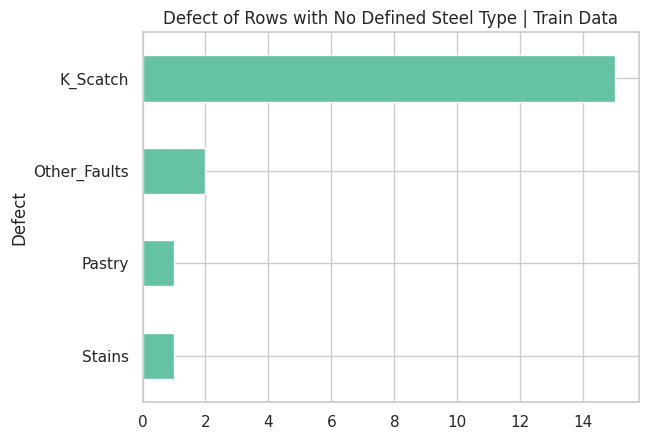

In [28]:
train_data.iloc[no_steeltype_indices]['Defect'].value_counts().sort_values().plot(kind = 'barh', title = 'Defect of Rows with No Defined Steel Type | Train Data')
plt.show()

<div style = '
  display:flex;
  flex-direction:row;
  border: 2px solid #3d3d3d;
  padding: 5px;
  box-shadow: 6px 9px;
  font-family: Ebrima;
  width:1000px'>
    <div style = 'display: flex; flex-direction: row'>
        <span style = 'font-size:22px; margin:58px 12px 0px 12px;'>🔎︎</span>
        <span style = 'border-right: thin solid black; margin: 15px 20px 15px 0px'></span>
    </div>
    <ul style = 'font-size: 18px'>
        <li>
            <p>Majority of rows with <u>no defined steel type</u> have a <code>K_Scatch</code> defect.</p>
        </li>
        <li>
            <p>Might just be noise from the synthetic generation of the dataset or could possibly be used as a predictor for defects of this kind. Further testing will have to be done.</p>
        </li>
    </ul>
</div>

In [29]:
# Enable to drop rows with undefined steel type of rows with double steel types
if CONFIG['DROP_STEELTYPES']:
    train_data.drop(no_steeltype_indices, inplace = True)
    train_data.drop(double_steeltype_indices, inplace = True)
    print('No Steel Type & Double Steel Types Dropped.')

No Steel Type & Double Steel Types Dropped.


<a id = 'chapter-two-sub-four'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 600px;'>
    <div>
        <h2>2.4. Distributions of Train and Original Data</h2>
    </div>
</div>

In [30]:
features = train_data.drop(classes + ['Defect'], axis = 1).columns.tolist()
ncols = 3
nrows = -(-len(features) // ncols)
kwargs = {'kde':True,
           'alpha':0.5,
           'bins':25}

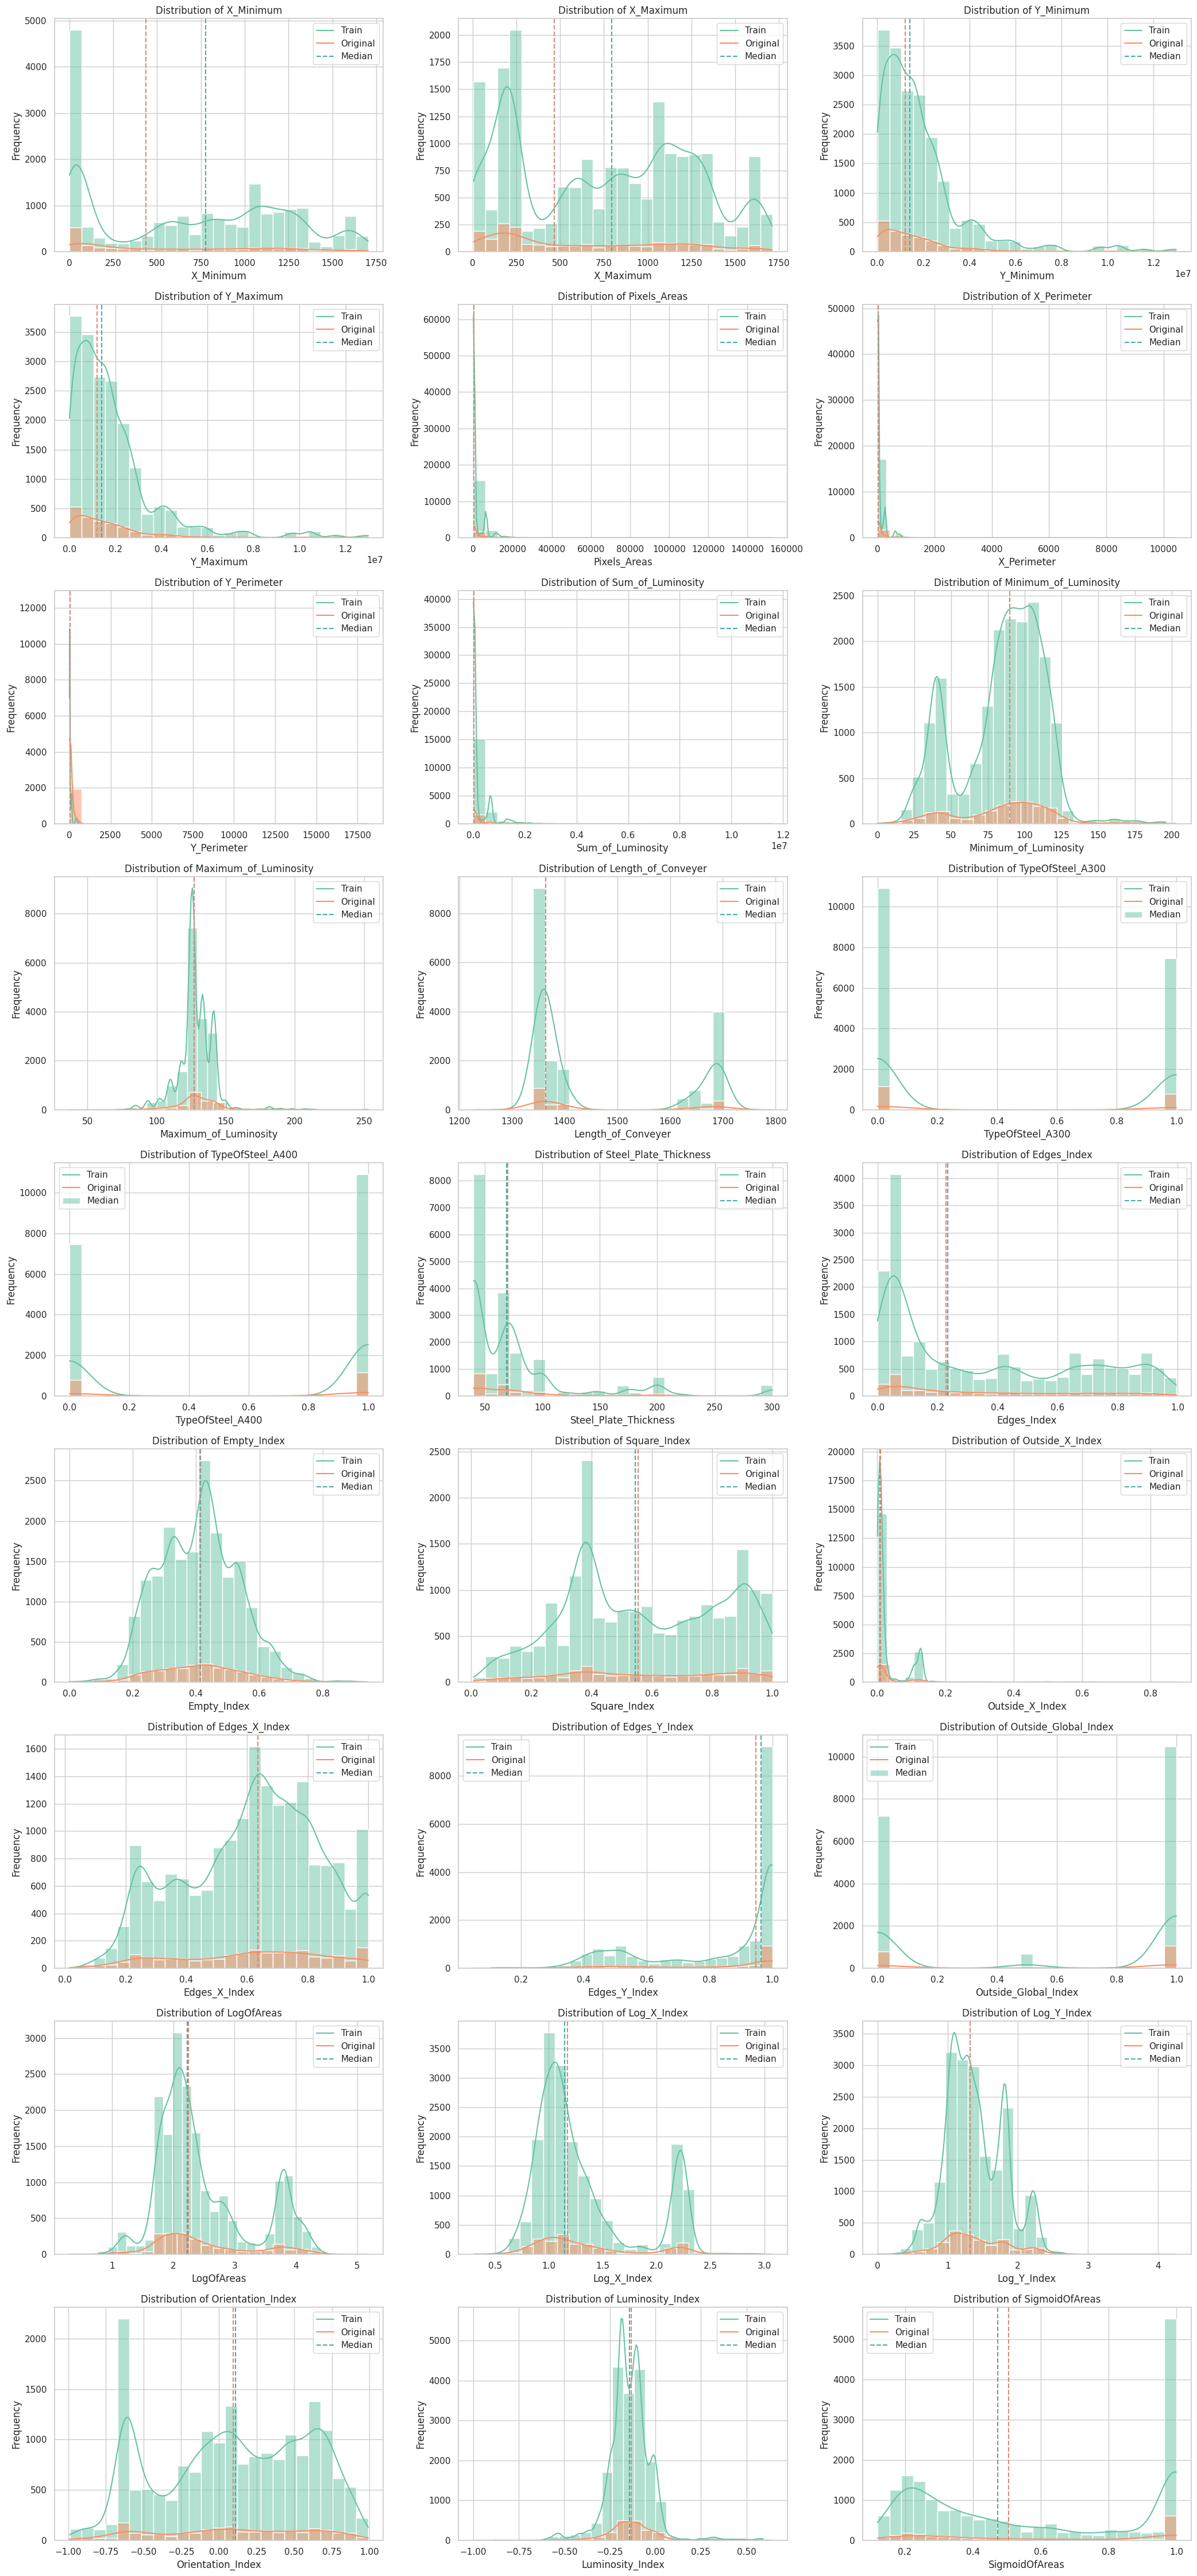

In [31]:
fig, axes = plt.subplots(nrows, ncols, figsize = (21, 5 * nrows))

for idx, feature in enumerate(features):
    row, col = idx // ncols, idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]
    
    sns.histplot(train_data[feature], label = 'Train', ax = ax, **kwargs)
    sns.histplot(orig_data[feature], label = 'Orig', ax = ax, **kwargs)
    
    if train_data[feature].nunique() > 4 and orig_data[feature].nunique() > 4:
        ax.axvline(x = train_data[feature].median(), color='#4caba4', linestyle='--')
        ax.axvline(x = orig_data[feature].median(), color='#d68c78', linestyle='--')
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend(labels = ['Train', 'Original', 'Median'])

if len(features) % ncols != 0:
    for j in range(len(features) % ncols, ncols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

<a id = 'chapter-three'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 20px 0px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px'>
    <div>
        <h1>3. Preprocessing</h1>
    </div>
</div>
<div style = 
'display:flex;
 border: 2px solid;
 border-radius: 1px 1px 20px 20px; 
 margin-top: 20px;
 text-align:center; 
 font-size: 20px; 
 background-color: #3d3d3d; 
 color: white'>
     <div style = 'width:50%; text-align:center; padding:5px'>
        <a href = '#chapter-two' style = 'color:white; text-decoration:none'>▲</a>
     </div>
    <div style = 'border-left: 10px solid white; margin-right:10px; margin-left:10px'>
     </div>
    <div style = 'width:50%; text-align:center; padding:5px'>
        <a href = '#chapter-four' style = 'color:white; text-decoration:none'>▼</a>
     </div>
</div>

In [32]:
# Enable to concat competition data with original data.
if CONFIG['COMBINE_W_ORIG']:
    train_data = pd.concat([train_data, orig_data])
    train_data.reset_index(drop = True, inplace = True)
    print('Concatenated Original Data onto Competition Data.')

train_data

Concatenated Original Data onto Competition Data.


X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            584        590     909972     909977            16            8   
1            808        816     728350     728372           433           20   
2             39        192    2212076    2212144         11388          705   
3            781        789    3353146    3353173           210           16   
4           1540       1560     618457     618502           521           72   
...          ...        ...        ...        ...           ...          ...   
20296        249        277     325780     325796           273           54   
20297        144        175     340581     340598           287           44   
20298        145        174     386779     386794           292           40   
20299        137        170     422497     422528           419           97   
20300       1261       1281      87951      87967           103           26   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0                5               2274                    113   
1               54              44478                     70   
2              420            1311391                     29   
3               29               3202                    114   
4               67              48231                     82   
...            ...                ...                    ...   
20296           22              35033                    119   
20297           24              34599                    112   
20298           22              37572                    120   
20299           47              52715                    117   
20300           22              11682                    101   

       Maximum_of_Luminosity  ...  Luminosity_Index  SigmoidOfAreas  Pastry  \
0                        140  ...           -0.0104          0.1417       0   
1                        111  ...           -0.2997          0.9491       0   
2                        141  ...           -0.0944          1.0000       0   
3                        134  ...           -0.0402          0.4025       0   
4                        111  ...           -0.2455          0.9998       0   
...                      ...  ...               ...             ...     ...   
20296                    141  ...            0.0026          0.7254       0   
20297                    133  ...           -0.0582          0.8173       0   
20298                    140  ...            0.0052          0.7079       0   
20299                    140  ...           -0.0171          0.9919       0   
20300                    133  ...           -0.1139          0.5296       0   

       Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  \
0              0         0       1          0      0             0   
1              0         0       0          0      0             1   
2              0         1       0          0      0             0   
3              0         1       0          0      0             0   
4              0         0       0          0      0             1   
...          ...       ...     ...        ...    ...           ...   
20296          0         0       0          0      0             1   
20297          0         0       0          0      0             1   
20298          0         0       0          0      0             1   
20299          0         0       0          0      0             1   
20300          0         0       0          0      0             1   

             Defect  
0            Stains  
1      Other_Faults  
2          K_Scatch  
3          K_Scatch  
4      Other_Faults  
...             ...  
20296  Other_Faults  
20297  Other_Faults  
20298  Other_Faults  
20299  Other_Faults  
20300  Other_Faults  

[20301 rows x 35 columns]

<a id = 'chapter-three-sub-one'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 400px;'>
    <div>
        <h2>3.1. Feature Engineering</h2>
    </div>
</div>

In [33]:
# Features from this discussion by IVAN ZADOROZNIY: https://www.kaggle.com/competitions/playground-series-s4e3/discussion/481687

from scipy.constants import pi

def feature_engineer(data, targets:list= None):
    data_copy = data.copy()
    
    if targets is not None:
        data_copy = data_copy.drop(targets, axis = 1)
        data_copy['Defect'] = np.argmax(data[targets], axis = 1)
        
    epsilon = 1e-6 # A small constant to avoid division by zero or taking the logarithm of zero
    
    data_copy['Aspect_Ratio'] = data['X_Maximum'] / data['Y_Maximum']
    data_copy['Compactness'] = (4 * pi * data['Pixels_Areas']) / (data['X_Perimeter'] + data['Y_Perimeter'])**2
    data_copy['Circularity'] = data['Pixels_Areas'] / (data['X_Perimeter']**2)
    data_copy['Density'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    
    data_copy['X_Range'] = data['X_Maximum'] - data['X_Minimum']
    data_copy['Y_Range'] = data['Y_Maximum'] - data['Y_Minimum']
    data_copy['Area_Perimeter_Ratio'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    data_copy['X_Center'] = (data['X_Minimum'] + data['X_Maximum']) / 2
    data_copy['Y_Center'] = (data['Y_Minimum'] + data['Y_Maximum']) / 2
    
    data_copy['Symmetry_Index'] = np.abs(data_copy['X_Range'] - data_copy['Y_Range']) / (data_copy['X_Range'] + data_copy['Y_Range'] + epsilon)
    data_copy['Relative_Perimeter'] = data['X_Perimeter'] / (data['X_Perimeter'] + data['Y_Perimeter'] + epsilon)
    data_copy['sin_orientation'] = np.sin(data['Orientation_Index'])
    data_copy['Edges_Index2'] = np.exp(data['Edges_Index'] + epsilon)
    data_copy['X_Maximum2'] = np.sin(data['X_Maximum'])
    data_copy['Y_Minimum2'] = np.sin(data['Y_Minimum'])
    
    data_copy['Normalized_Steel_Thickness'] = (data['Steel_Plate_Thickness'] - data['Steel_Plate_Thickness'].min()) / (data['Steel_Plate_Thickness'].max() - data['Steel_Plate_Thickness'].min())
    
    data_copy['Luminosity_Range'] = data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity']
    data_copy['Average_Luminosity'] = (data['Maximum_of_Luminosity'] + data['Minimum_of_Luminosity']) / 2
    
    data_copy['Log_Perimeter'] = np.log(data['X_Perimeter'] + data['Y_Perimeter'] + epsilon)
    data_copy['Log_Luminostiy'] = np.log(data['Sum_of_Luminosity'] + epsilon)
    data_copy['Log_Aspect_Ratio'] = np.log(data_copy['Aspect_Ratio']**2 + epsilon)
    
    if targets is not None:
        for target in targets:
            data_copy[target] = data[target]
    
    return data_copy

if CONFIG['APPLY_FEATURE_ENGINE']:
    train_data = feature_engineer(train_data, targets = train_data.columns[-8:-1].tolist())
    test_data = feature_engineer(test_data)

In [34]:
train_data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0        584        590     909972     909977            16            8   
1        808        816     728350     728372           433           20   
2         39        192    2212076    2212144         11388          705   
3        781        789    3353146    3353173           210           16   
4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0            5               2274                    113   
1           54              44478                     70   
2          420            1311391                     29   
3           29               3202                    114   
4           67              48231                     82   

   Maximum_of_Luminosity  ...  Log_Perimeter  Log_Luminostiy  \
0                    140  ...       2.564949        7.729296   
1                    111  ...       4.304065       10.702750   
2                    141  ...       7.025538       14.086599   
3                    134  ...       3.806663        8.071531   
4                    111  ...       4.934474       10.783757   

   Log_Aspect_Ratio  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0        -13.464585       0          0         0       1          0      0   
1        -13.002322       0          0         0       0          0      0   
2        -13.808006       0          0         1       0          0      0   
3        -13.761623       0          0         1       0          0      0   
4        -11.819232       0          0         0       0          0      0   

   Other_Faults  
0             0  
1             1  
2             0  
3             0  
4             1  

[5 rows x 56 columns]

In [35]:
test_data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0       1015       1033    3826564    3826588           659           23   
1       1257       1271     419960     419973           370           26   
2       1358       1372     117715     117724           289           36   
3        158        168     232415     232440            80           10   
4        559        592     544375     544389           140           19   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           46              62357                     67   
1           28              39293                     92   
2           32              29386                    101   
3           11               8586                    107   
4           15              15524                    103   

   Maximum_of_Luminosity  ...  sin_orientation  Edges_Index2  X_Maximum2  \
0                    127  ...         0.623100      1.473589    0.551351   
1                    132  ...         0.787227      1.176920    0.974622   
2                    134  ...        -0.500174      1.062794    0.768177   
3                    140  ...         0.180800      1.558776   -0.997173   
4                    134  ...        -0.540810      2.268460    0.981964   

   Y_Minimum2  Normalized_Steel_Thickness  Luminosity_Range  \
0   -0.457668                    0.423077                60   
1   -0.968428                    0.000000                40   
2   -0.458876                    0.000000                33   
3   -0.024510                    0.230769                33   
4   -0.174122                    0.076923                31   

   Average_Luminosity  Log_Perimeter  Log_Luminostiy  Log_Aspect_Ratio  
0                97.0       4.234107       11.040631        -13.745169  
1               112.0       3.988984       10.578802        -11.497150  
2               117.5       4.219508       10.288274         -8.896811  
3               123.5       3.044522        9.057888        -13.395228  
4               118.5       3.526361        9.650142        -13.035010  

[5 rows x 48 columns]

In [36]:
# Split into features and labels
if CONFIG['APPLY_FEATURE_ENGINE']:
    X = np.array(train_data.drop(classes + ['Defect'], axis = 1))
    y = np.array(train_data['Defect'])
else: 
    train_data['Defect'] = np.argmax(train_data[classes], axis = 1)
    X = np.array(train_data.drop(classes + ['Defect'], axis = 1))
    y = np.array(train_data['Defect'])

X.shape, y.shape

((20301, 48), (20301,))

<a id = 'chapter-four'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 20px 0px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px'>
    <div>
        <h1>4. Modelling</h1>
    </div>
</div>
<div style = 
'display:flex;
 border: 2px solid;
 border-radius: 1px 1px 20px 20px; 
 margin-top: 20px; 
 text-align:center; 
 font-size: 20px; 
 background-color: #3d3d3d; 
 color: white'>
     <div style = 'width:50%; text-align:center; padding:5px'>
        <a href = '#chapter-three' style = 'color:white; text-decoration:none'>▲</a>
     </div>
    <div style = 'border-left: 10px solid white; margin-right:10px; margin-left:10px'>
     </div>
    <div style = 'width:50%; text-align:center; padding:5px'>
        <a href = '#chapter-five' style = 'color:white; text-decoration:none'>▼</a>
     </div>
</div>

In [37]:
class CrossValidator:
    def __init__(self, 
                 models, 
                 metric_fns, 
                 cv_method, 
                 scaler = None, 
                 name = None, 
                 pi_kwargs = None, 
                 pred_probs = False, 
                 verbose = True):
        """
           A class for performing cross-validation on a set of models with various metric functions.

           Attributes:
               models (list): A list of tuples containing the model name and the model object.
               metric_fns (list): A list of tuples containing the metric name and the metric function.
               cv_method (object): A cross-validation method object from scikit-learn.
               scaler (object, optional): A scaler object from scikit-learn to scale the data.
               name (str, optional): A name for the cross-validator.
               pi_kwargs (dict, optional): A dictionary of keyword arguments for permutation importance calculation.
               pred_probs (bool, optional): Whether to predict probabilities or class labels.
               perm_imp (dict, optional): A dictionary containing permutation importances for each model.
               oof_preds (dict, optional): A dictionary containing out-of-fold predictions for each model.
               oof_metrics (dict, optional): A dictionary containing out-of-fold metric scores for each model.
               data (tuple, optional): A tuple containing the test features and labels used in each fold.
               oof_metrics_df (pd.DataFrame, optional): A pandas DataFrame containing the mean out-of-fold metric scores for each model.

           Methods:
               _calculate_metrics(y_test, y_pred): Calculates and prints the metric scores for a given set of true labels and predicted labels.
               _cross_validate(X, y): Performs cross-validation on the given data and models, and stores the out-of-fold predictions, metric scores, and permutation importances.
               _get_oof_metrics(metric_dict): Converts the out-of-fold metric scores dictionary to a pandas DataFrame.
               fit(X, y): Initiates the cross-validation process and stores the results.
       """
        
        self.name = name
        self.verbose = verbose
        
        self.models = models
        self.metric_fns = metric_fns
        self.cv_method = cv_method
        self.scaler = scaler
        self.pi_kwargs = pi_kwargs
        self.pred_probs = pred_probs
        
        self.perm_imp = None
        self.oof_preds = None
        self.oof_metrics = None
        self.data = None
        
        self.oof_metrics_df = None
    
    def _calculate_metrics(self, y_test, y_pred):
        # Dictionary to store the score for each metric
        results = {}

        # Loop through each metric
        for metric_fn in self.metric_fns:
            # Calculate score using metric
            if metric_fn[0] == 'ROC AUC':
                score = metric_fn[1](y_test, y_pred, multi_class = 'ovr')
            else:
                score = metric_fn[1](y_test, y_pred)

            # Store score as value and metric as key
            results[metric_fn[0]] = score
            
            if self.verbose:
                # Display metric score
                print(f'{metric_fn[0]} : {score:.5f}\n')
        
        return results

    def _cross_validate(self, X, y):
        # Dictionaries to store out-of-fold predictions and out-of-fold metric scores
        oof_preds, oof_metrics = {}, {}
        
        # Lists to aggregate test features and labels used in each fold
        x_data, y_data = [], []
        
        # Dictionary to store permutation feature importance for each fold
        perm_imp = {}
        
        if self.verbose:
            print(f'Name: {self.name} | {self.cv_method.n_splits}-Fold\n')
        
        for idx, (train_idx, test_idx) in enumerate(self.cv_method.split(X, y)):
            if self.verbose:
                print(f'Fold {idx}:')
                print('-'*40+'\n')
            
            x_train, x_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            x_data.extend(x_test)
            y_data.extend(y_test)
            
            if self.scaler is not None:
                x_train = self.scaler.fit_transform(x_train)
                x_test = self.scaler.transform(x_test)
            
            for model in self.models:
                if self.verbose:
                    print(f'Cross-validating: [{model[0]}]\n')
                
                model[1].fit(x_train, y_train)
                
                if model[0] not in oof_preds:
                    oof_preds[model[0]] = []
                    oof_metrics[model[0]] = {}                    
                    perm_imp[model[0]] = []
                
                y_pred = model[1].predict_proba(x_test) if self.pred_probs else model[1].predict(x_test)
                
                # Save model predictions
                oof_preds[model[0]].append(y_pred)
                
                # Calculate metrics
                for metric_name, result in self._calculate_metrics(y_test, y_pred).items():
                    # Save metric result if not already in dictionary
                    if metric_name not in oof_metrics[model[0]]:
                        oof_metrics[model[0]][metric_name] = []
                    oof_metrics[model[0]][metric_name].append(result)
                
                # Calculate permutation importances
                if self.pi_kwargs is not None:
                    if self.verbose:
                        print(' -- Calculating Permutation Importances...\n')
                    perm_result = permutation_importance(model[1], x_test, y_test, **self.pi_kwargs)
                    perm_imp[model[0]].append(perm_result.importances)
        
        if self.pi_kwargs is not None:
            self.perm_imp = perm_imp
        
        return oof_preds, oof_metrics, (x_data, y_data)
    
    def _get_oof_metrics(self, metric_dict):
        dict, df = {'models' : []}, pd.DataFrame()
        
        for model in list(metric_dict.keys()):
            dict['models'].append(model)
            for metric in list(metric_dict[model].keys()):
                if metric not in dict:
                    dict[metric] = []
                dict[metric].append(np.mean(metric_dict[model][metric]))

        df.index = dict['models']
        for metric in list(dict.keys())[1:]:
            df[metric] = dict[metric]

        return df      
    
    def fit(self, X, y):
        self.oof_preds, self.oof_metrics, self.data = self._cross_validate(X, y)
        self.oof_metrics_df = self._get_oof_metrics(self.oof_metrics)

In [38]:
base_models = [('HGBClassifier', HistGradientBoostingClassifier()),
               ('CatBoostClassifier', CatBoostClassifier(verbose = False)),
               ('XGBClassifier', XGBClassifier()),
               ('LGBMClassifier', LGBMClassifier(verbosity = -1))]

metric_fns = [('ROC AUC', roc_auc_score),
              ('Log Loss', log_loss)]

In [39]:
def top_k_permutation_scores(perm_dict, features, k = 5, ncols = 2):
    model_pi_df = pd.DataFrame(index = features)
    for model, importances in perm_dict.items():
        model_pi_df[f'{model}'] = np.mean(np.concatenate(importances, axis = 1), axis = 1)    
        
    nrows = -(-len(model_pi_df.columns) // ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize = (18, 8*nrows))
    for idx, model in enumerate(model_pi_df.columns.tolist()):
        row, col = idx // ncols, idx % ncols
        ax = axes[row, col] if nrows > 1 else axes[col]
        model_pi_df[model].sort_values()[-k:].plot(kind = 'barh', ax = ax, title = f'{model} | Top {k} PI Scores')
        
    if len(perm_dict.keys()) % ncols != 0:
        for j in range(len(perm_dict.keys()) % ncols, ncols):
            axes[-1, j].axis('off')
    
    fig.tight_layout()
    plt.show()
    
    return model_pi_df

<a id = 'chapter-four-sub-one'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 600px;'>
    <div>
        <h2>4.1. Cross-validate with Base Parameters</h2>
    </div>
</div>

In [40]:
base_models_cv = CrossValidator(models = base_models + [('VotingClassifier', VotingClassifier(base_models, voting = 'soft'))], # Adding a VotingClassifier consisting of all base models to assess combined predictive power
                                metric_fns = metric_fns, 
                                cv_method = StratifiedKFold(n_splits = 5, shuffle = True, random_state = CONFIG['SEED']),
                                scaler = CONFIG['SCALER'],
                                pred_probs = True,
                                pi_kwargs = {'scoring':'roc_auc_ovr', 'random_state': CONFIG['SEED'], 'n_jobs':-1, 'n_repeats':5},
                                name = 'Base Models w/ RobustScaler')
base_models_cv.fit(X, y)
base_models_cv.oof_metrics_df.sort_values(by = 'ROC AUC', ascending = False)

Name: Base Models w/ RobustScaler | 5-Fold

Fold 0:
----------------------------------------

Cross-validating: [HGBClassifier]

ROC AUC : 0.89529

Log Loss : 0.89189

 -- Calculating Permutation Importances...

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.89480

Log Loss : 0.89569

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.89236

Log Loss : 0.94180

 -- Calculating Permutation Importances...

Cross-validating: [LGBMClassifier]

ROC AUC : 0.89500

Log Loss : 0.90495

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current versio

Cross-validating: [VotingClassifier]

ROC AUC : 0.89936

Log Loss : 0.87860

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Fold 1:
----------------------------------------

Cross-validating: [HGBClassifier]

ROC AUC : 0.89889

Log Loss : 0.88084

 -- Calculating Permutation Importances...

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.89810

Log Loss : 0.88830

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.89254

Log Loss : 0.93685

 -- Calculating Permutation Importances...

Cross-validating: [LGBMClassifier]

ROC AUC : 0.89879

Log Loss : 0.89387

 -- Calculating Permutation Importances...

Cross-validating: [VotingClassifier]

ROC AUC : 0.90158

Log Loss : 0.87130

 -- Calculating Permutation Importances...

Fold 2:
----------------------------------------

Cross-validating: [HGBClassifier]

ROC AUC : 0.89206

Log Loss : 0.90679

 -- Calculating Permutation Importances...

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.89372

Log Loss : 0.90028

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.88849

Log Lo

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Cross-validating: [VotingClassifier]

ROC AUC : 0.89552

Log Loss : 0.89189

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Fold 3:
----------------------------------------

Cross-validating: [HGBClassifier]

ROC AUC : 0.89481

Log Loss : 0.89545

 -- Calculating Permutation Importances...

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.89560

Log Loss : 0.89306

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.88979

Log Loss : 0.95517

 -- Calculating Permutation Importances...

Cross-validating: [LGBMClassifier]

ROC AUC : 0.89430

Log Loss : 0.90974

 -- Calculating Permutation Importances...

Cross-validating: [VotingClassifier]

ROC AUC : 0.89877

Log Loss : 0.87991

 -- Calculating Permutation Importances...

Fold 4:
----------------------------------------

Cross-validating: [HGBClassifier]

ROC AUC : 0.89239

Log Loss : 0.91388

 -- Calculating Permutation Importances...

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.89318

Log Loss : 0.90854

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.88746

Log Lo

ROC AUC  Log Loss
VotingClassifier    0.898382  0.884131
CatBoostClassifier  0.895080  0.897174
HGBClassifier       0.894690  0.897770
LGBMClassifier      0.894425  0.912798
XGBClassifier       0.890127  0.955196

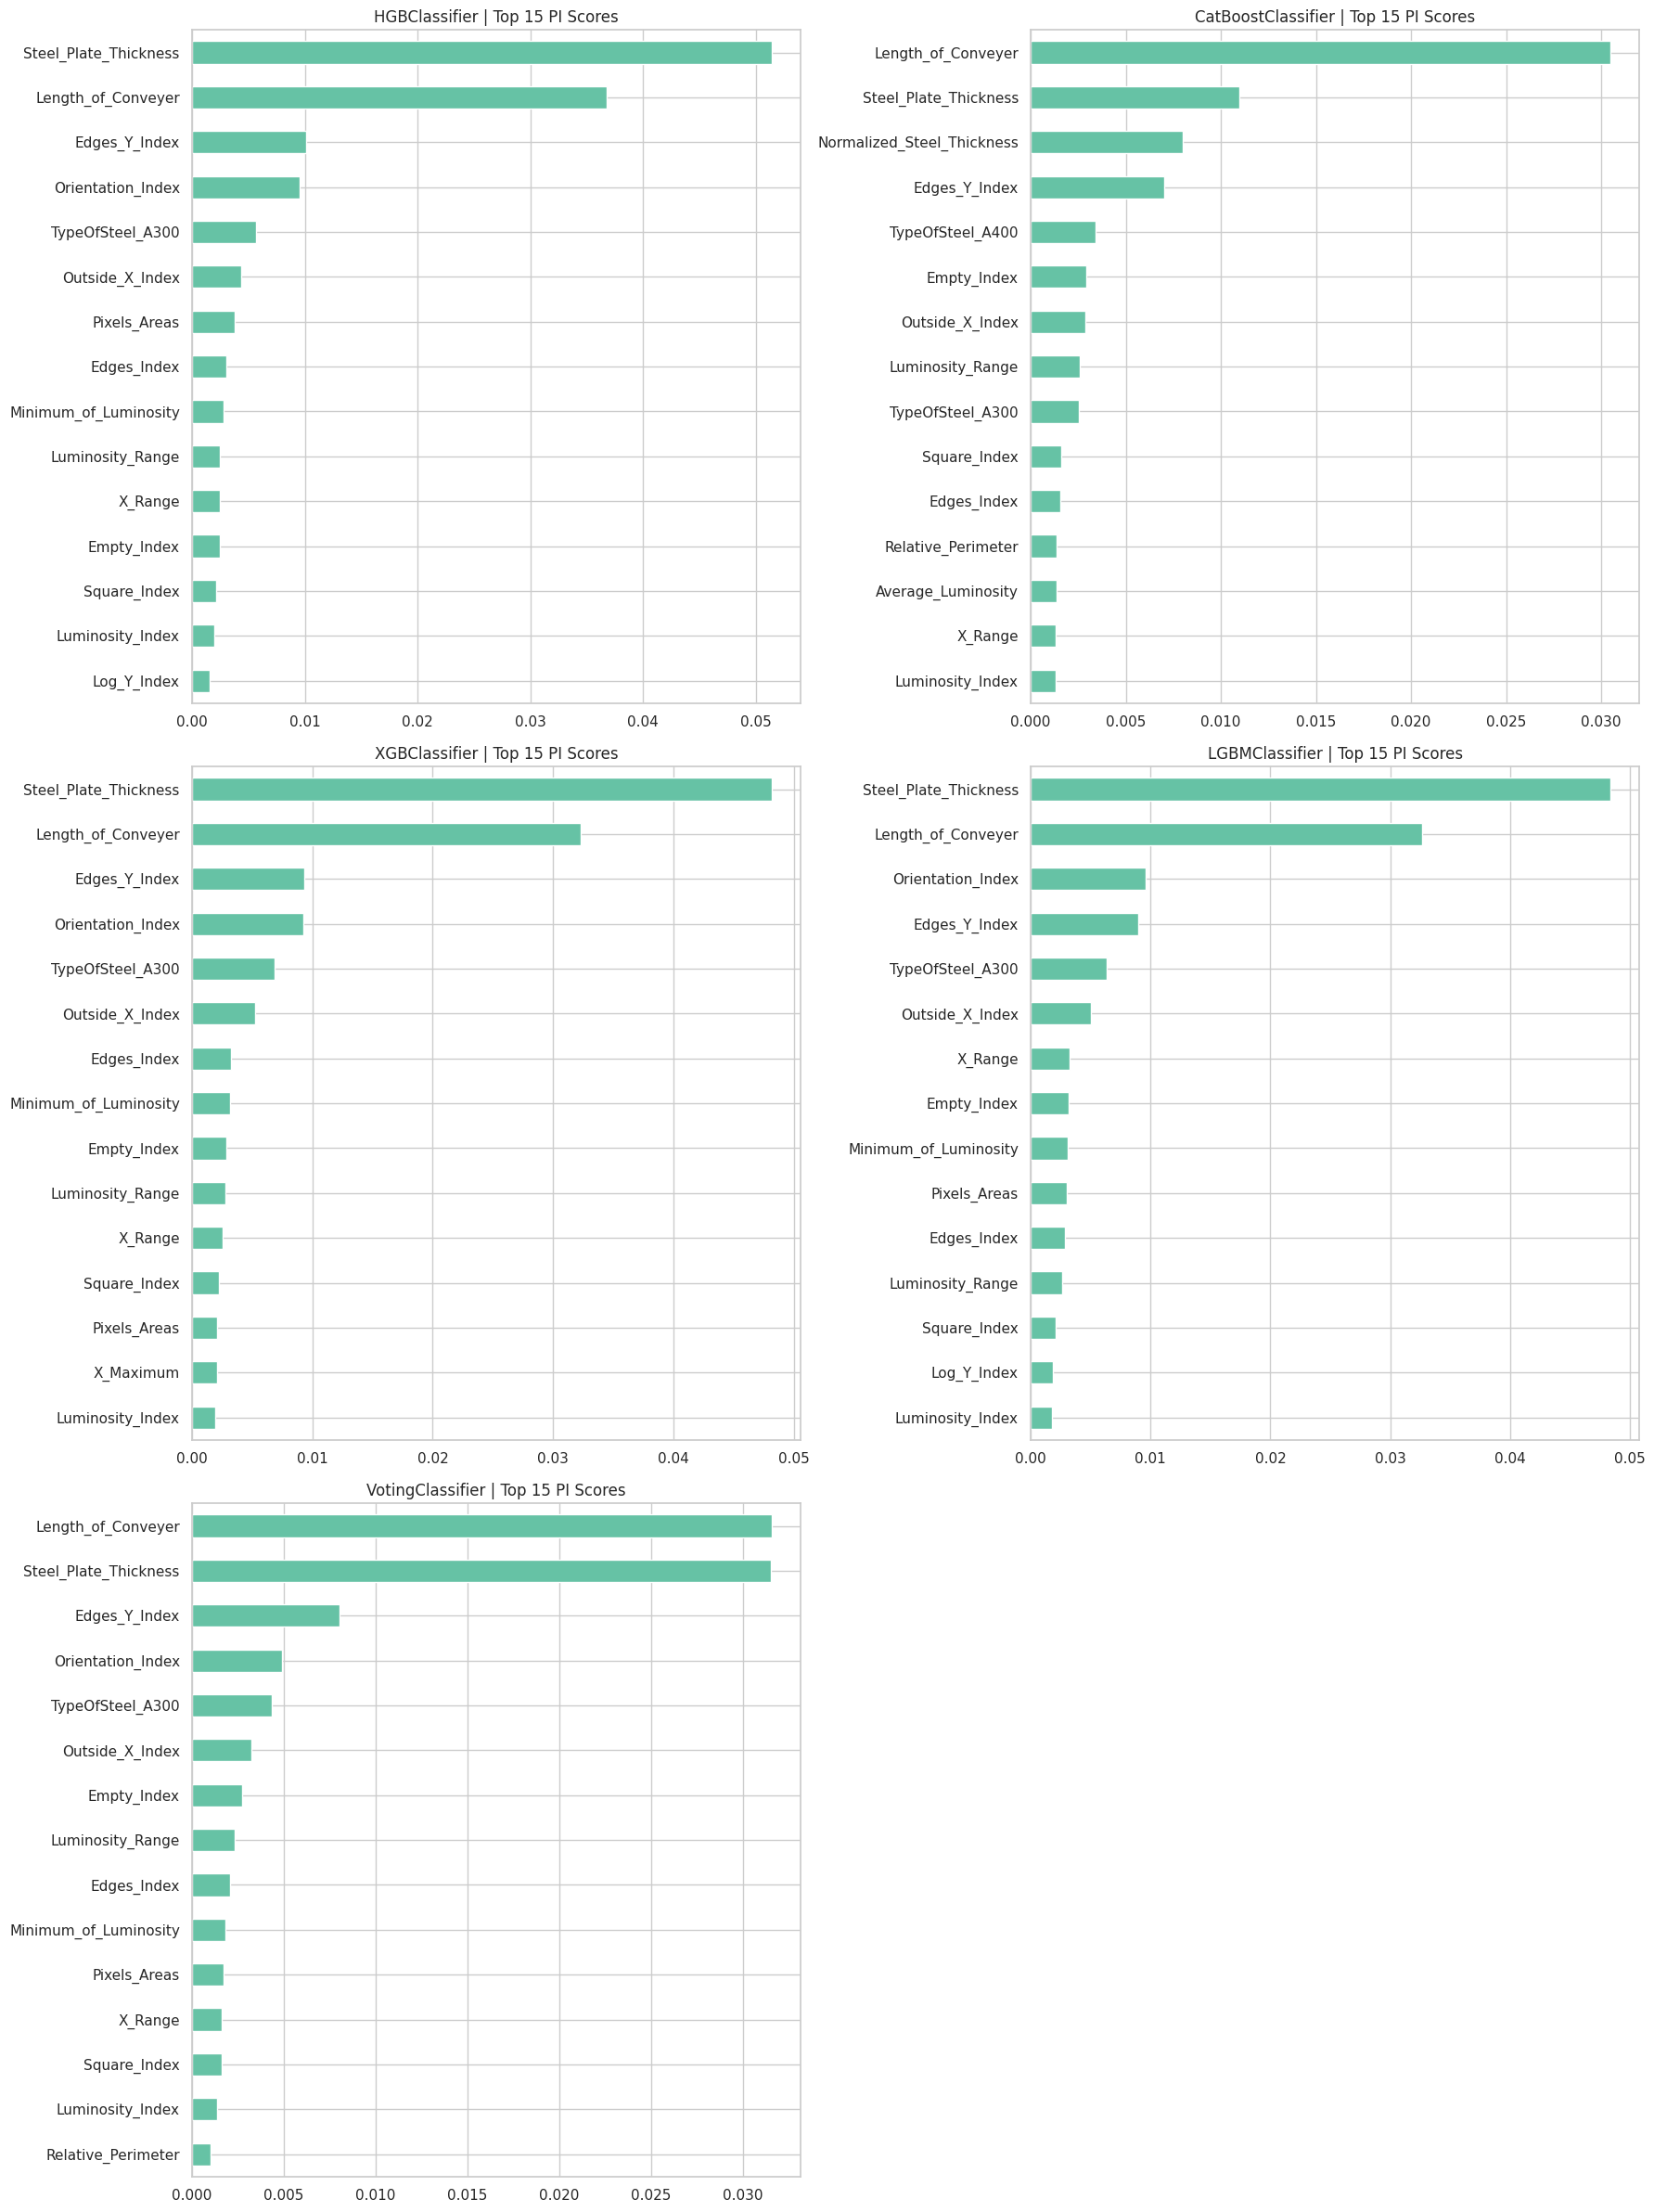

In [41]:
# View top 15 permutation scores for each model
model_pi_df = top_k_permutation_scores(base_models_cv.perm_imp, 
                                       train_data.drop(classes + ['Defect'], axis = 1).columns.tolist(),
                                       k = 15)

In [42]:
model_pi_df.style.background_gradient(cmap = 'Greens')

<a id = 'chapter-four-sub-two'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 400px'>
    <div>
        <h2>4.2. Feature Selection</h2>
    </div>
</div>

In [43]:
# PI threshold value
thresh = 0.0005

# Show values below threshold
below_thresh_feats_df = model_pi_df[model_pi_df < thresh].dropna(how = 'all')
below_thresh_feats_df

HGBClassifier  CatBoostClassifier  XGBClassifier  \
Y_Minimum                        0.000153           -0.000143       0.000362   
Y_Maximum                        0.000043           -0.000313      -0.000102   
X_Perimeter                           NaN            0.000286            NaN   
Sum_of_Luminosity                     NaN            0.000387            NaN   
TypeOfSteel_A400                 0.000378                 NaN       0.000000   
Outside_Global_Index                  NaN                 NaN       0.000220   
Log_X_Index                           NaN            0.000427            NaN   
Aspect_Ratio                     0.000295           -0.000057            NaN   
Compactness                      0.000369            0.000359            NaN   
Circularity                      0.000335           -0.000019       0.000442   
Density                               NaN            0.000157            NaN   
Y_Range                          0.000130           -0.000136       0.000134   
Area_Perimeter_Ratio             0.000000           -0.000096       0.000000   
X_Center                              NaN            0.000246            NaN   
Y_Center                         0.000041           -0.000030       0.000101   
Symmetry_Index                   0.000345            0.000232            NaN   
sin_orientation                  0.000000                 NaN       0.000000   
Edges_Index2                     0.000000            0.000402       0.000000   
X_Maximum2                       0.000184           -0.000166       0.000074   
Y_Minimum2                      -0.000086            0.000023       0.000042   
Normalized_Steel_Thickness       0.000000                 NaN       0.000000   
Log_Perimeter                         NaN            0.000216            NaN   
Log_Luminostiy                   0.000000            0.000455       0.000000   
Log_Aspect_Ratio                 0.000000           -0.000236       0.000049   

                            LGBMClassifier  VotingClassifier  
Y_Minimum                         0.000021          0.000017  
Y_Maximum                         0.000173         -0.000073  
X_Perimeter                            NaN          0.000358  
Sum_of_Luminosity                      NaN               NaN  
TypeOfSteel_A400                  0.000158               NaN  
Outside_Global_Index                   NaN          0.000422  
Log_X_Index                            NaN          0.000311  
Aspect_Ratio                      0.000105          0.000117  
Compactness                       0.000445          0.000192  
Circularity                            NaN          0.000095  
Density                                NaN          0.000261  
Y_Range                           0.000334         -0.000042  
Area_Perimeter_Ratio              0.000000         -0.000019  
X_Center                               NaN          0.000414  
Y_Center                         -0.000060         -0.000088  
Symmetry_Index                    0.000312          0.000326  
sin_orientation                   0.000000          0.000155  
Edges_Index2                      0.000000          0.000036  
X_Maximum2                       -0.000076         -0.000030  
Y_Minimum2                       -0.000169         -0.000004  
Normalized_Steel_Thickness        0.000000               NaN  
Log_Perimeter                          NaN          0.000317  
Log_Luminostiy                    0.000000         -0.000016  
Log_Aspect_Ratio                  0.000000         -0.000057

In [44]:
all_below_thresh_cols = below_thresh_feats_df.index.tolist()
all_below_thresh_cols

['Y_Minimum',
 'Y_Maximum',
 'X_Perimeter',
 'Sum_of_Luminosity',
 'TypeOfSteel_A400',
 'Outside_Global_Index',
 'Log_X_Index',
 'Aspect_Ratio',
 'Compactness',
 'Circularity',
 'Density',
 'Y_Range',
 'Area_Perimeter_Ratio',
 'X_Center',
 'Y_Center',
 'Symmetry_Index',
 'sin_orientation',
 'Edges_Index2',
 'X_Maximum2',
 'Y_Minimum2',
 'Normalized_Steel_Thickness',
 'Log_Perimeter',
 'Log_Luminostiy',
 'Log_Aspect_Ratio']

In [45]:
# Get features that have low permutation importance (< PI)
below_thresh_counts = (below_thresh_feats_df < thresh).sum(axis = 1)

# Get indices of features whose PI score satisifes the above condition and is present in all 
# or at least 3 models in the below_thresh_feats dataframe
below_thresh_indices = [idx for idx, val in enumerate(below_thresh_counts) \
                        if val <= len(model_pi_df.columns) and val >= 3]

feats_below_thresh = below_thresh_counts.index[below_thresh_indices].tolist()
feats_below_thresh

['Y_Minimum',
 'Y_Maximum',
 'TypeOfSteel_A400',
 'Aspect_Ratio',
 'Compactness',
 'Circularity',
 'Y_Range',
 'Area_Perimeter_Ratio',
 'Y_Center',
 'Symmetry_Index',
 'sin_orientation',
 'Edges_Index2',
 'X_Maximum2',
 'Y_Minimum2',
 'Normalized_Steel_Thickness',
 'Log_Luminostiy',
 'Log_Aspect_Ratio']

In [46]:
# Recommended features to drop by OSCAR AGUILAR: https://www.kaggle.com/competitions/playground-series-s4e3/discussion/482401
recom_to_drop = ['Sum_of_Luminosity', 'X_Perimeter', 'SigmoidOfAreas', 'Edges_X_Index', 'Y_Minimum','Y_Maximum']

In [47]:
# Using chi-squared method inspired by this notebook by TOMAS UŽDAVINYS on feature selection: https://www.kaggle.com/code/uzdavinys/pg-s04e03-feature-selection-using-sklearn#3-Compare-different-methods

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = CONFIG['SEED'], stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Percentage of features to drop
perc_to_drop = 0.2

top_n = len(train_data.drop(classes + ['Defect'], axis = 1).columns) - int(len(train_data.drop(classes + ['Defect'], axis = 1).columns) * perc_to_drop)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

# SelectKBest object with chi2 as the scoring function
chi2_selector = SelectKBest(chi2, k = top_n)
_ = chi2_selector.fit_transform(X_scaled, y_train)

select_feats_mask = chi2_selector.get_support(indices = True)

selected_feats = train_data.drop(classes + ['Defect'], axis = 1).columns[select_feats_mask].tolist()
dropped_feats = [col for col in train_data.drop(classes + ['Defect'], axis = 1).columns if col not in selected_feats]

print(f'Chi^2 Dropped Features :\n\n{dropped_feats}\n')
print(f'Chi^2 Selected Features:\n\n{selected_feats}')

Chi^2 Dropped Features :

['Y_Minimum', 'Maximum_of_Luminosity', 'Luminosity_Index', 'X_Range', 'Y_Range', 'Y_Center', 'Symmetry_Index', 'X_Maximum2', 'Y_Minimum2']

Chi^2 Selected Features:

['X_Minimum', 'X_Maximum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'SigmoidOfAreas', 'Aspect_Ratio', 'Compactness', 'Circularity', 'Density', 'Area_Perimeter_Ratio', 'X_Center', 'Relative_Perimeter', 'sin_orientation', 'Edges_Index2', 'Normalized_Steel_Thickness', 'Luminosity_Range', 'Average_Luminosity', 'Log_Perimeter', 'Log_Luminostiy', 'Log_Aspect_Ratio']


In [48]:
final_drop_feats = list(set(dropped_feats + feats_below_thresh + recom_to_drop))
final_selected_feats = [feat for feat in selected_feats if feat not in final_drop_feats]

print(f'Features to Drop ({len(final_drop_feats)} features):\n\n{final_drop_feats}')

Features to Drop (24 features):

['Circularity', 'SigmoidOfAreas', 'Edges_Index2', 'X_Maximum2', 'Maximum_of_Luminosity', 'Y_Maximum', 'X_Perimeter', 'Log_Aspect_Ratio', 'Symmetry_Index', 'Log_Luminostiy', 'Compactness', 'Area_Perimeter_Ratio', 'TypeOfSteel_A400', 'Sum_of_Luminosity', 'Edges_X_Index', 'X_Range', 'sin_orientation', 'Normalized_Steel_Thickness', 'Y_Minimum2', 'Y_Center', 'Aspect_Ratio', 'Y_Minimum', 'Luminosity_Index', 'Y_Range']


In [49]:
print(f'Features Selected ({len(final_selected_feats)} Features):\n\n{final_selected_feats}')

Features Selected (24 Features):

['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'Y_Perimeter', 'Minimum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Density', 'X_Center', 'Relative_Perimeter', 'Luminosity_Range', 'Average_Luminosity', 'Log_Perimeter']


In [50]:
# Enable to use all features
# Disable to use selected features from feature selection process
X_t = np.array(train_data[final_selected_feats]) if CONFIG['APPLY_FEATURE_SELECT'] else np.array(train_data.drop(classes + ['Defect'], axis = 1))
X_t.shape

(20301, 24)

<a id = 'chapter-four-sub-three'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 0px 20px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px;
  width: 500px;'>
    <div>
        <h2>4.3. Hyperparameter Tuning</h2>
    </div>
</div>

In [51]:
from optuna.samplers import TPESampler

def cat_objective(trial):
    params = {
        'iterations':trial.suggest_int('iterations', 100, 1000),
        'learning_rate':trial.suggest_float('learning_rate', 1e-3, 1e-1, log = True),
        'depth':trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg':trial.suggest_float('l2_leaf_reg', 1e-8, 100.0, log = True),
        'bootstrap_type':trial.suggest_categorical('bootstrap_type', ['Bayesian']),
        'random_strength':trial.suggest_float('random_strength', 1e-8, 10.0, log = True),
        'bagging_temperature':trial.suggest_float('bagging_temperature', 0.0, 10.0),
        'od_type':trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait':trial.suggest_int('od_wait', 10, 50),
        'grow_policy': trial.suggest_categorical('grow_policy', ['Lossguide', 'SymmetricTree'])
    }
    
    if CONFIG['ENABLE_GPU']:
        params['task_type'] = trial.suggest_categorical('task_type', ['GPU'])
    
    cb_cv = CrossValidator([('CatBoostClassifier', CatBoostClassifier(**params, verbose = False))],
                           metric_fns, 
                           StratifiedKFold(n_splits = 5, shuffle = True, random_state = CONFIG['SEED']), 
                           RobustScaler(), 
                           pred_probs = True, 
                           verbose = False)
    cb_cv.fit(X_t, y)
    return cb_cv.oof_metrics_df.T['CatBoostClassifier']['ROC AUC']

def hgb_objective(trial):
    params = {
        'l2_regularization': trial.suggest_float('l2_regularization',1e-3,10.0, log = True),
        'learning_rate': trial.suggest_float('learning_rate', 0.001,0.1, log = True),
        'max_iter': trial.suggest_categorical('max_iter', [1000]),
        'max_depth': trial.suggest_int('max_depth', 2,30),
        'max_bins': trial.suggest_int('max_bins', 100,255),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 20,1000),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 20,80),
    }

    hgb_cv = CrossValidator([('HGBClassifier', HistGradientBoostingClassifier(**params))], 
                            metric_fns,
                            StratifiedKFold(n_splits = 5, shuffle = True, random_state = CONFIG['SEED']),
                            RobustScaler(),
                            pred_probs = True,
                            verbose = False)
    hgb_cv.fit(X_t, y)
    return hgb_cv.oof_metrics_df.T['HGBClassifier']['ROC AUC']

def xgb_objective(trial):
    params = {
        'objective': trial.suggest_categorical('objective', ['multiclass']),
        'metric': trial.suggest_categorical('metric', ['multi_logloss']),
        'tree_method': trial.suggest_categorical('tree_method', ['hist']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise']),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'booster':trial.suggest_categorical('booster', ['gbtree']),
        'random_state':trial.suggest_int('random_state', 1, 500),
        'num_class': trial.suggest_categorical('num_class', [7])
    }
    
    if CONFIG['ENABLE_GPU']:
        params['device'] = trial.suggest_categorical('device', ['gpu'])

    xgb_cv = CrossValidator([('XGBClassifier', XGBClassifier(**params))], 
                            metric_fns,
                            StratifiedKFold(n_splits = 5, shuffle = True, random_state = CONFIG['SEED']),
                            RobustScaler(),
                            pred_probs = True,
                            verbose = False)
    xgb_cv.fit(X_t, y)
    return xgb_cv.oof_metrics_df.T['XGBClassifier']['ROC AUC']

def lgbm_objective(trial):
    params = {
        'objective': trial.suggest_categorical('objective', ['multiclass']),
        'metric': trial.suggest_categorical('metric', ['multi_logloss']),
        "boosting_type": trial.suggest_categorical('boosting_type', ['gbdt']),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "random_state": trial.suggest_int("random_state", 1, 1000),
        "num_class": trial.suggest_categorical("num_class", [7])
    }
    
    if CONFIG['ENABLE_GPU']:
        params['device_type'] = trial.suggest_categorical('device_type', ['gpu'])
    
    lgbm_cv = CrossValidator([('LGBMClassifier', LGBMClassifier(**params, verbosity = -1))], 
                            metric_fns,
                            StratifiedKFold(n_splits = 5, shuffle = True, random_state = CONFIG['SEED']),
                            RobustScaler(),
                            pred_probs = True,
                            verbose = False)
    lgbm_cv.fit(X_t, y)
    return lgbm_cv.oof_metrics_df.T['LGBMClassifier']['ROC AUC']

sampler = TPESampler(seed = CONFIG['SEED'])

In [52]:
# cat_study = optuna.create_study(study_name = "catboost", direction = "maximize", sampler = sampler)
# cat_study.optimize(cat_objective, n_trials = 100)

In [53]:
# hgb_study = optuna.create_study(study_name = 'hgb', direction = 'maximize', sampler = sampler)
# hgb_study.optimize(hgb_objective, n_trials = 100)

In [54]:
# xgb_study = optuna.create_study(study_name = 'xgb', direction = 'maximize', sampler = sampler)
# xgb_study.optimize(xgb_objective, n_trials = 100)

In [55]:
# lgbm_study = optuna.create_study(study_name = 'lgbm', direction = 'maximize', sampler = sampler)
# lgbm_study.optimize(lgbm_objective, n_trials = 100)

In [56]:
cat_params = {'iterations': 957,
 'learning_rate': 0.016339847763841994,
 'depth': 9,
 'l2_leaf_reg': 0.14904532501104456,
 'bootstrap_type': 'Bayesian',
 'random_strength': 0.5238186114680305,
 'bagging_temperature': 0.6199302372452001,
 'od_type': 'IncToDec',
 'od_wait': 44,
 'grow_policy': 'Lossguide',
 'task_type': 'GPU'}

hgb_params = {'l2_regularization': 0.004423105047794063, 
              'learning_rate': 0.00873833560628938, 
              'max_iter': 1000, 
              'max_depth': 10, 
              'max_bins': 204, 
              'min_samples_leaf': 702, 
              'max_leaf_nodes': 59}

xgb_params = {'objective': 'multiclass',
 'metric': 'multi_logloss',
 'tree_method': 'hist',
 'grow_policy': 'depthwise',
 'max_depth': 4,
 'learning_rate': 0.014839187270097802,
 'n_estimators': 951,
 'min_child_weight': 5,
 'gamma': 2.450881340653213e-07,
 'subsample': 0.4797371361804905,
 'colsample_bytree': 0.3174955505282327,
 'reg_alpha': 1.8804495356960797e-08,
 'reg_lambda': 5.913821397864531e-05,
 'booster': 'gbtree',
 'random_state': 375,
 'num_class': 7,
 'device': 'gpu'}

lgbm_params = {'objective': 'multiclass',
 'metric': 'multi_logloss',
 'boosting_type': 'gbdt',
 'lambda_l1': 4.613313641783845,
 'lambda_l2': 2.0424404955694744e-06,
 'num_leaves': 7,
 'feature_fraction': 0.5392968131942781,
 'bagging_fraction': 0.9145869412819702,
 'bagging_freq': 2,
 'min_child_samples': 38,
 'random_state': 589,
 'num_class': 7,
 'device_type': 'gpu'}

In [57]:
tuned_models = [('CatBoostClassifier', CatBoostClassifier(**cat_params, verbose = False)),
                ('HGBClassifier', HistGradientBoostingClassifier(**hgb_params)), 
                ('XGBClassifier', XGBClassifier(**xgb_params)),
                ('LGBMClassifier', LGBMClassifier(**lgbm_params, verbosity = -1))]

In [58]:
optuna_models_cv = CrossValidator(models = tuned_models + [('VotingClassifier', VotingClassifier(tuned_models, voting = 'soft'))],
                                  metric_fns = metric_fns,
                                  cv_method = StratifiedKFold(n_splits = 10, shuffle = True, random_state = CONFIG['SEED']),
                                  scaler = CONFIG['SCALER'],
                                  pred_probs = True,
                                  pi_kwargs = {'scoring':'roc_auc_ovr', 'random_state':CONFIG['SEED'], 'n_jobs':-1, 'n_repeats':5},
                                  name = 'Tuned Models w/ RobustScaler')
optuna_models_cv.fit(X_t, y)
optuna_models_cv.oof_metrics_df.sort_values(by = 'ROC AUC', ascending = False)

Name: Tuned Models w/ RobustScaler | 10-Fold

Fold 0:
----------------------------------------

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.90060

Log Loss : 0.87369

 -- Calculating Permutation Importances...

Cross-validating: [HGBClassifier]

ROC AUC : 0.89909

Log Loss : 0.87777

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.90271

Log Loss : 0.86582

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:25:18] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:25:18] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

Cross-validating: [LGBMClassifier]



1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


ROC AUC : 0.90089

Log Loss : 0.86780

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Cross-validating: [VotingClassifier]

ROC AUC : 0.90280

Log Loss : 0.86319

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:26:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using

Fold 1:
----------------------------------------

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.90278

Log Loss : 0.86777

 -- Calculating Permutation Importances...

Cross-validating: [HGBClassifier]

ROC AUC : 0.90004

Log Loss : 0.86820

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.90423

Log Loss : 0.85872

 -- Calculating Permutation Importances...

Cross-validating: [LGBMClassifier]

ROC AUC : 0.90401

Log Loss : 0.85536

 -- Calculating Permutation Importances...

Cross-validating: [VotingClassifier]

ROC AUC : 0.90466

Log Loss : 0.85555

 -- Calculating Permutation Importances...

Fold 2:
----------------------------------------

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.90094

Log Loss : 0.89128

 -- Calculating Permutation Importances...

Cross-validating: [HGBClassifier]

ROC AUC : 0.89919

Log Loss : 0.88445

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.90063

Log Lo

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:47:32] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:47:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

Cross-validating: [LGBMClassifier]

ROC AUC : 0.90119

Log Loss : 0.87055

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Cross-validating: [VotingClassifier]

ROC AUC : 0.90360

Log Loss : 0.86324

 -- Calculating Permutation Importances...



/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:49:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using

Fold 6:
----------------------------------------

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.89886

Log Loss : 0.87437

 -- Calculating Permutation Importances...

Cross-validating: [HGBClassifier]

ROC AUC : 0.89642

Log Loss : 0.87016

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.90032

Log Loss : 0.86111

 -- Calculating Permutation Importances...

Cross-validating: [LGBMClassifier]

ROC AUC : 0.89789

Log Loss : 0.86836

 -- Calculating Permutation Importances...

Cross-validating: [VotingClassifier]

ROC AUC : 0.90035

Log Loss : 0.86130

 -- Calculating Permutation Importances...

Fold 7:
----------------------------------------

Cross-validating: [CatBoostClassifier]

ROC AUC : 0.90322

Log Loss : 0.87817

 -- Calculating Permutation Importances...

Cross-validating: [HGBClassifier]

ROC AUC : 0.89922

Log Loss : 0.87444

 -- Calculating Permutation Importances...

Cross-validating: [XGBClassifier]

ROC AUC : 0.90463

Log Lo

ROC AUC  Log Loss
VotingClassifier    0.902232  0.866104
XGBClassifier       0.901867  0.866630
CatBoostClassifier  0.900534  0.877760
LGBMClassifier      0.900199  0.871872
HGBClassifier       0.898901  0.875545

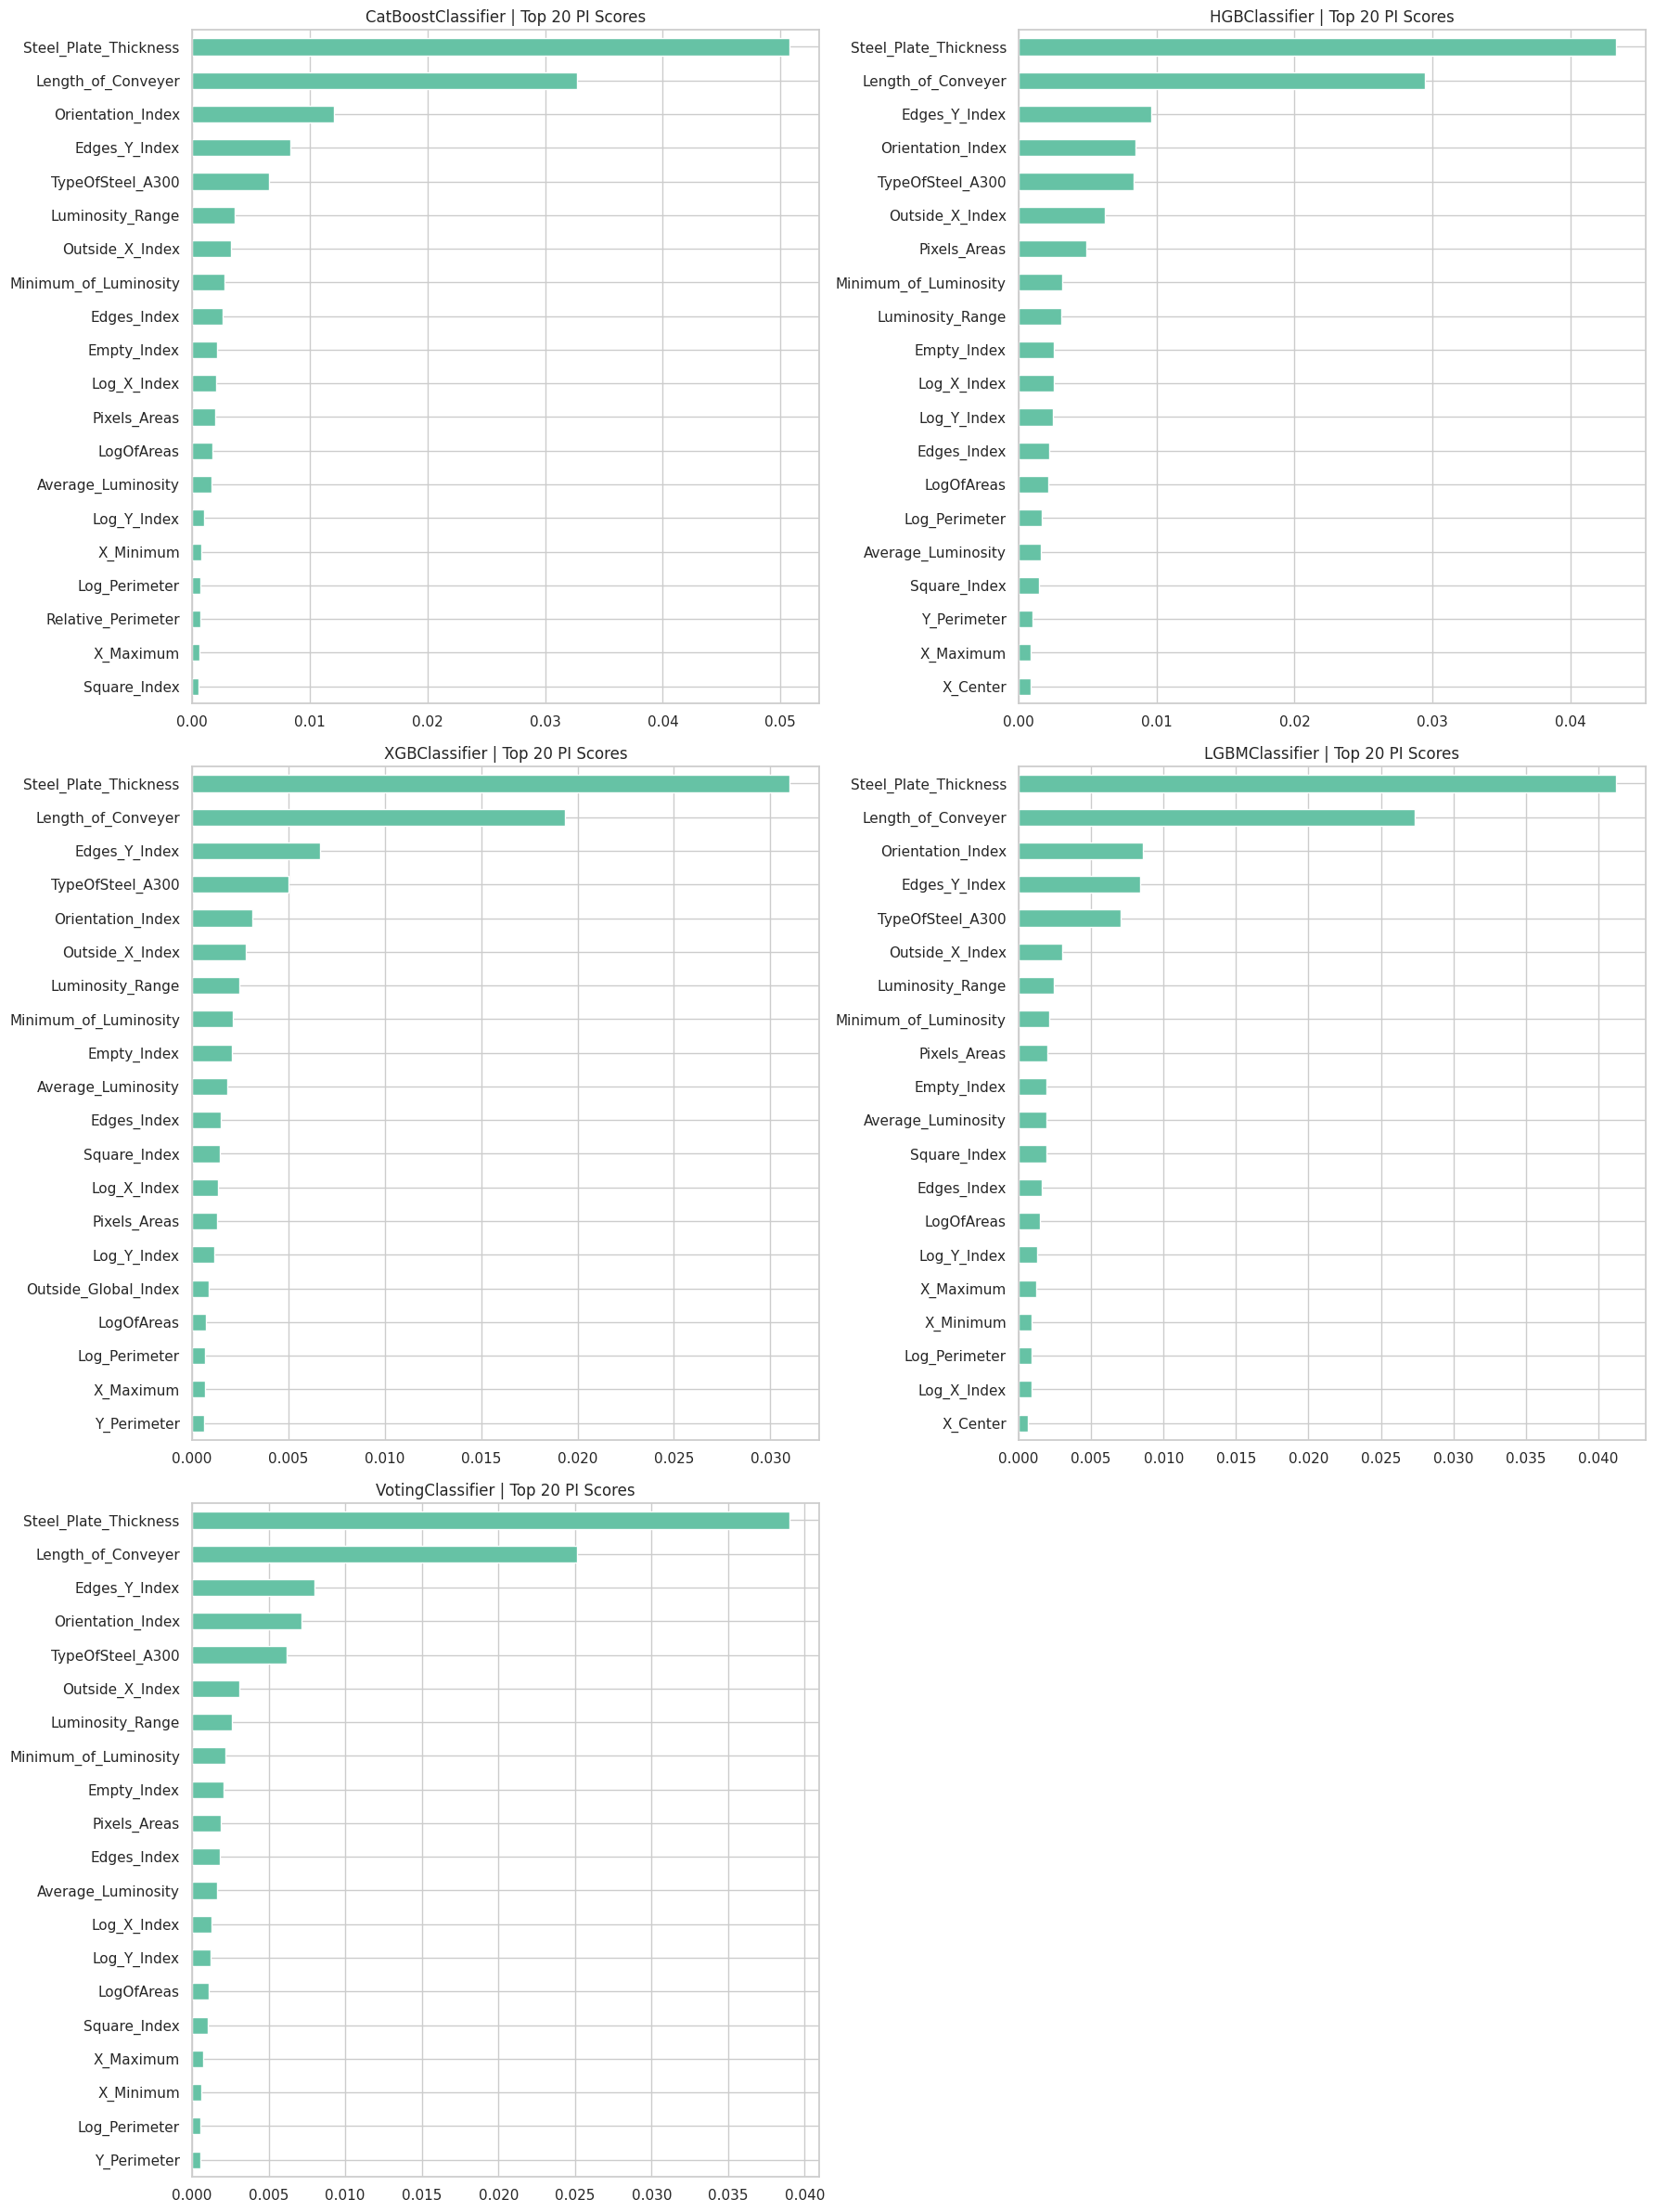

In [59]:
# View top 20 permutation scores for each model
optuna_pi_df = top_k_permutation_scores(optuna_models_cv.perm_imp,
                                        final_selected_feats, 
                                        k = 20)

In [60]:
optuna_pi_df.style.background_gradient(cmap = 'Greens')

<a id = 'chapter-five'></a>
<div style = 
 'border: 2px solid #3d3d3d;
  border-radius: 20px 0px 20px 0px;
  padding: 15px;
  box-shadow: 6px 9px;
  text-align:center;
  font-family: Ebrima;
  letter-spacing:1px'>
    <div>
        <h1>5. Submission</h1>
    </div>
</div>
<div style = 
'border: 2px solid;
 border-radius: 1px 1px 20px 20px; 
 margin-top: 20px; 
 padding:5px;
 text-align:center; 
 font-size: 20px; 
 background-color: #3d3d3d; 
 text-align:center;
 color: white'>
     <a href = '#home' style = 'color:white; text-decoration:none'>▲ - To Beginning</a>
</div>

In [61]:
vc_weights = [0.2, 0.1, 0.6, 0.1]

# Create VotingClassifier Pipeline
vc_pipe = make_pipeline(CONFIG['SCALER'], 
                        VotingClassifier(tuned_models, voting = 'soft', weights = vc_weights))
vc_pipe.fit(X_t, y)
vc_preds = vc_pipe.predict_proba(test_data[final_selected_feats])
vc_preds[:5]

array([[6.24435311e-01, 1.95895875e-03, 3.60762205e-03, 1.46393331e-04,
        1.67620251e-02, 1.01941623e-01, 2.51148067e-01],
       [2.46833208e-01, 2.94735122e-02, 9.11563826e-03, 5.82096513e-04,
        1.54699273e-01, 1.89179779e-01, 3.70116476e-01],
       [3.80083696e-03, 4.80882289e-02, 3.43936280e-02, 9.90093431e-04,
        1.06163840e-02, 3.42280555e-01, 5.59830276e-01],
       [1.75438164e-01, 4.19829362e-03, 1.49284472e-03, 2.04376602e-03,
        1.65248533e-02, 3.90645297e-01, 4.09656789e-01],
       [3.76404736e-03, 3.74462268e-03, 1.75921001e-03, 4.67519305e-03,
        6.29364272e-03, 6.77348324e-01, 3.02414953e-01]])

In [62]:
# Create XGB Pipeline
xgb_pipe = make_pipeline(CONFIG['SCALER'],
                         XGBClassifier(**xgb_params))

xgb_pipe.fit(X_t, y)
xgb_preds = xgb_pipe.predict_proba(test_data[final_selected_feats])
xgb_preds[:5]

array([[5.8014119e-01, 1.5825650e-03, 3.7924936e-03, 1.6528810e-04,
        1.6350599e-02, 1.1525866e-01, 2.8270921e-01],
       [2.5062430e-01, 3.7049316e-02, 9.2342095e-03, 4.1170802e-04,
        1.4522210e-01, 1.8793565e-01, 3.6952269e-01],
       [3.9217924e-03, 5.0126094e-02, 3.2215759e-02, 6.9804076e-04,
        1.1552189e-02, 3.5436168e-01, 5.4712445e-01],
       [1.6176607e-01, 5.1983739e-03, 1.7691392e-03, 1.9053436e-03,
        1.6124435e-02, 4.0366229e-01, 4.0957436e-01],
       [2.6712641e-03, 4.2430735e-03, 1.4090297e-03, 5.1216879e-03,
        6.0177259e-03, 6.7119652e-01, 3.0934069e-01]], dtype=float32)

In [63]:
# Creating submission
submission = pd.read_csv(main_dir + 'sample_submission.csv')
submission[classes] = (vc_preds*0.7  + xgb_preds*0.3) / (0.7 + 0.3)
submission.to_csv('submission.csv', index = False)
submission[:5]

id    Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0  19219  0.611147   0.001846  0.003663  0.000152   0.016639  0.105937   
1  19220  0.247971   0.031746  0.009151  0.000531   0.151856  0.188807   
2  19221  0.003837   0.048700  0.033740  0.000902   0.010897  0.345905   
3  19222  0.171337   0.004498  0.001576  0.002002   0.016405  0.394550   
4  19223  0.003436   0.003894  0.001654  0.004809   0.006211  0.675503   

   Other_Faults  
0      0.260616  
1      0.369938  
2      0.556019  
3      0.409632  
4      0.304493